<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:**  Francisco Javier Enriquez Muñoz, José Pablo Vázquez Tello, Aniel Villanueva.

**Fecha:** Martes 25 de Febrero del 2020.

**Profesor:** Oscar David Jaramillo Zuluaga.
 
**PROYECTO MODULO 2** : Sensibilidad en tendencias bursátiles: un análisis en tiempos de coronavirus.


### 1.1 Título del trabajo.
> Sensibilidad en tendencias bursátiles: un análisis en tiempos de coronavirus.

### 1.2 Objetivos.
> - Explorar si la geolocalización tiene un alto impacto en el cambio de tendencia de los índices bursátiles.

> #### 1.1 Objetivo general.
> - Analizar el comportamiento de tendencias antes y durante el coronavirus de los índices bursátiles. 

> #### 1.2 Objetivos específicos

>  - Estimar la probabilidad con la distribución Binomial, Normal y jarquer bera de la tendencia a la alza de un activo financiero, antes de casos postivos del coronavirus en la geolocalización del índice bursátil.
>  - Estimar la probabilidad con la distribución Bernoulli de que un activo financiero vaya a la alza, después de casos postivos del coronavirus en la geolocalización del índice bursátil.
>  - Simular y pronosticar el valor del activo financiero a través del método Montecarlo crudo y estratificado para conocer tendencias futuras. 
>  - Validar y cuantificar las estimaciones de tendencias pre-coronavirus y coronavirus con los valores financieros de su posterior etapa. 

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.

> El coronavirus ha propiciado un desbalance económico, cultural, turístico y deportivo en la mayor parte de los países, ante esto, diferentes agentes internacionales de los diversos sectores como financiero, salud, industrial y público, han comenzado a implementar medidas para mitigar el riesgo de contagio y pérdida en sus operaciones de negocios.

> Uno de los sectores más mediáticos y afectados, es el financiero, o mejor conocido, como bursátil, aquel en el que operan las bolsas de valores, en los que destacan los índices bursátiles, se puede pensar en un índice bursátil como en una 'cesta' de acciones que proporciona una amplia muestra de una industria, sector o economía nacional. El rendimiento colectivo de estas acciones proporciona una buena indicación de las tendencias en el mercado global que representan, es decir, este indicador nos permite conocer la evolución y comportamiento del mercado financiero en particular, en el caso de México, es representado por el IPC.  

> Considerando a los índices bursátiles como el ente financiero más próximo a una representación de una economía nacional, y a su vez, de los activos financieros que mayor impacto han tenido a causa del coronavirus, sería importante conocer cómo ha impactado este evento de salud, catalogado como “pandemia”, a través de modelar la tendencia alcista o bajista de los índices bursátiles cuantificada a través de simulaciones, pronósticos y distribución de probabilidad Bernoulli y Gaussiana.

> Dado que es un problema global, se ha decido trabajar con el índice bursátil de China y México, los cuáles están en dos continentes diferentes.

> Se utilizarán series temporales de frecuencia diaria con 1 año de distancia.

> Entre los supuestos para que el modelo funcione:
 -	Se trabajará con los rendimientos aritméticos de las series de tiempo de los índices bursátiles
 -	No afecta al modelo, las diferencias entre cada país respecto sus sistemas de salud, empleo, fiscal, económico y financiero. 

!
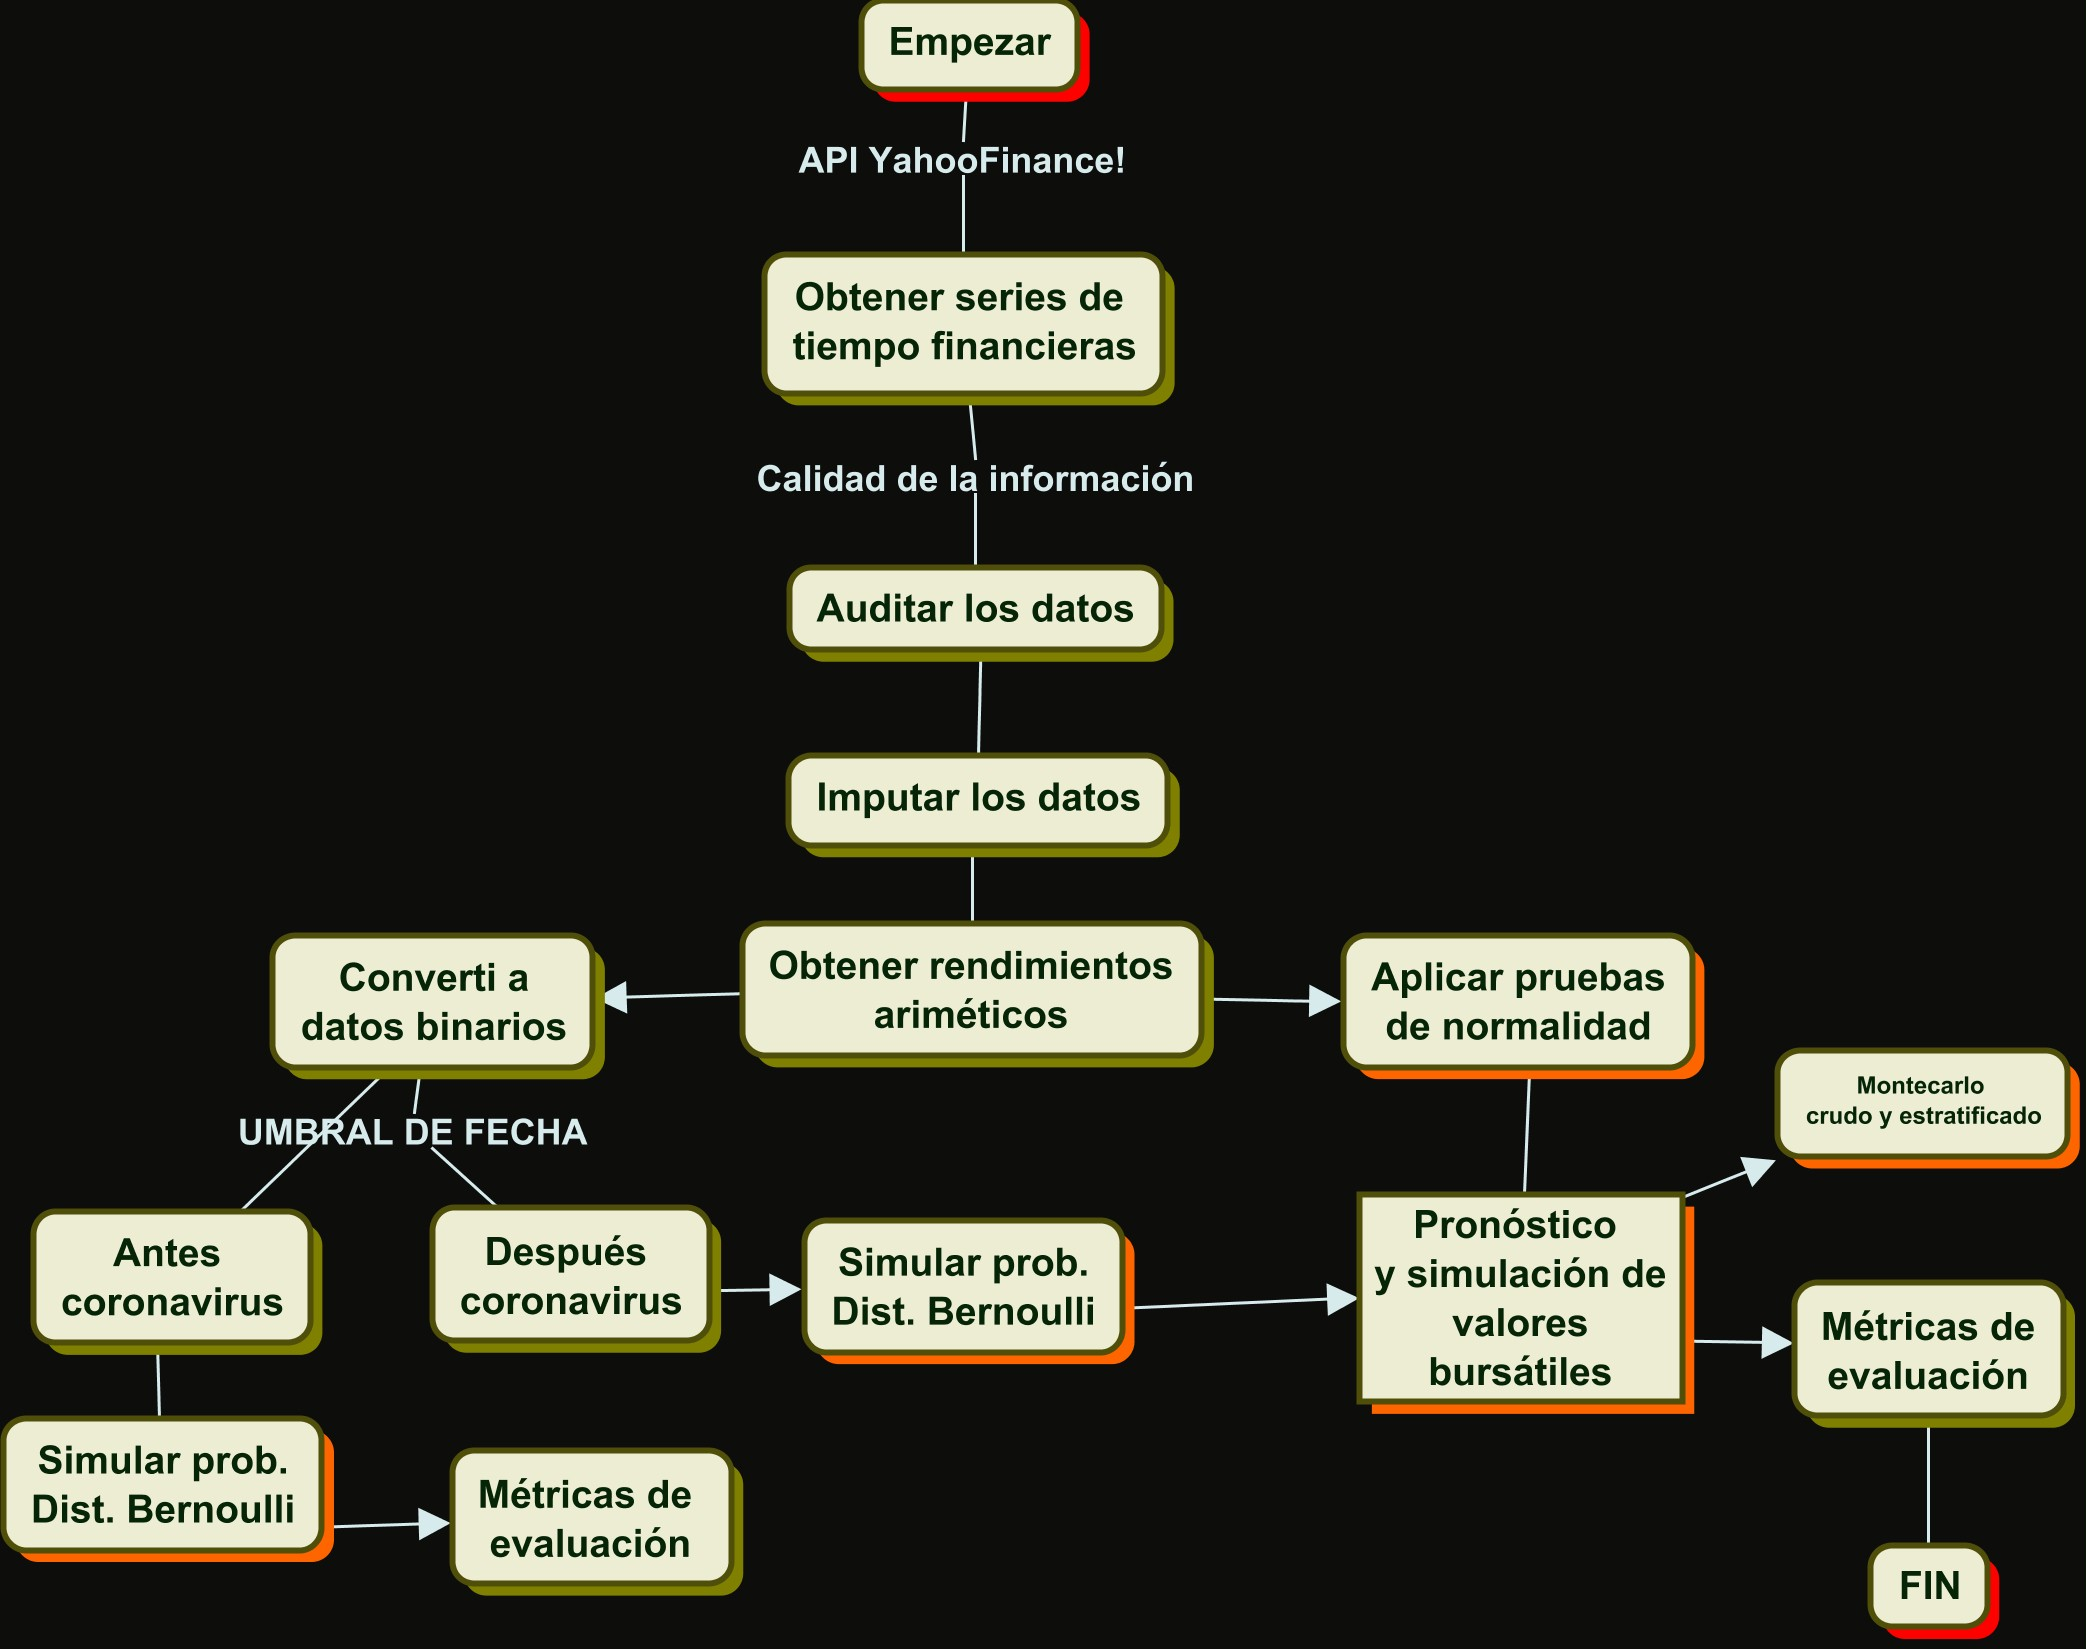

### 1.4 Nodos y variables que se decidieron simular y porqué

> Los nodos en color naranja, serán los que se simularán. Se tendrán 4 simulaciones y un pronóstico, comenzando con la simulación de Bernoulli, servirá para acatar el cumplimiento de la estimación de la probabilidad de las tendencias alcistas y bajistas en tiempo pre-coronavirus y coronavirus, así mismo permitirá la comparación de estos periodos y se evaluará qué tanto ha cambiado esta contigencia de salud la tendencia del índice bursátil. Antes del pronóstico, los rendimiento deberán cumplir que pertenecen a una distribución normal a través de la prueba estadística Jarque-Bera y del ajuste de la curva por medio de su primer y segundo momento para simular la curva, ya que es un requisito fundamental para poder generar un pronóstico. la El pronóstico aportará un análisis más robusto sobre el comportamiento del activo financiero, y se constrastará con el resultado de la tendencia coronavirus y así evaluar los resultado de esta simulación. 





### 1.7 Visualización de resultados de simulación.

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #check if the object is list-like, answer is a boolean
#objects that are considered list-like are for example Python list, tuples, sets, NumPy arrays, and pandas series 
#Strings and datetime objects, however, are not considered list-like.
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
#import import_ipynb
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial
from scipy.special import comb # Importamos la función combinatoria
from scipy.stats import norm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import statsmodels as sm
import statsmodels.api as statsmodels
from pandas.util.testing import assert_frame_equal
from sklearn.neighbors import KernelDensity
import matplotlib
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


> **Close price**: the closing price of a stock is the price of that stock at the close of the trading day.

> **Adjusted price**: it is a more complex analysis that uses the closing price as a starting point, but it takes into account factors such as dividends, stock splits and new stock offerings to determine a value.

A stock split is a corporate action in which a company divides its existing shares into multiple shares to boost the liquidity of the shares. Although the number of shares outstanding increases by a specific multiple, the total dollar value of the shares remains the same compared to pre-split amounts, because the split does not add any real value. The most common split ratios are 2-for-1 or 3-for-1, which means that the stockholder will have two or three shares, respectively, for every share held earlier

## Nodo 1: Índices bursátiles (antes y después del covid-19)

In [2]:
#call and extract data from yahoo finance
def timeseries(ticker:'símbolos de compañías', 
               source: 'fuente de información', 
               start: 'fecha(s) de inicio', 
               end: 'fecha final', 
               column: 'columnas que se quieran obtener del raw data'): 
    get_data = web.DataReader(ticker, source, start, end)[column]
    return get_data

In [3]:
#Párametros para la función timeseries
#ticker = ['^MXX', '^DJI','^IBEX','^FCHI','^KS11','000001.SS']
ticker = ['^MXX','^DJI','^IBEX','^FCHI','^KS11','000001.SS']
source = 'yahoo'
start = '2018-01-01' 
end = '2020-03-20'

In [4]:
ts = timeseries(ticker, source, start, end, 'Adj Close')

In [5]:
ts

Symbols,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2018-01-02,50033.949219,24824.009766,10079.099609,5288.600098,NaN,3348.325928
2018-01-03,49782.230469,24922.679688,10116.000000,5331.279785,2486.350098,3369.107910
2018-01-04,49744.621094,25075.130859,10314.400391,5413.689941,2466.459961,3385.709961
2018-01-05,49887.738281,25295.869141,10411.400391,5470.750000,2497.520020,3391.750000
2018-01-08,49995.570312,25283.000000,10398.400391,5487.419922,2513.280029,3409.479980
...,...,...,...,...,...,...
2020-03-16,NaN,20188.519531,6107.200195,3881.459961,1714.859985,2789.253906
2020-03-17,36862.839844,21237.380859,6498.500000,3991.780029,1672.439941,2779.641113
2020-03-18,35532.738281,19898.919922,6274.799805,3754.840088,1591.199951,2728.756104


In [6]:
#overview about data quality 
def dqr(data):        
        import numpy as np
        import pandas as pd

        #%%Lista de variables de la base de datos
        columns =  pd.DataFrame(list(data.columns.values),
                                columns=['Nombres'],
                                index=list(data.columns.values))
        
        #%% Lista de tipos de datos
        data_types = pd.DataFrame(data.dtypes,columns=['Data_Types']) #Nombre de la columna
        
        #%% Lista de datos perdidos
        missing_values  = pd.DataFrame(data.isnull().sum(), columns=['missing_values']) # No hay datos perdidos 
        #%% Lista de los datos presentes
        present_values = pd.DataFrame(data.count(), columns=['present_Values'])
            #%% Lista de valores únicos
        unique_values = pd.DataFrame(columns=['Unique_Values'])
        for col in list(data.columns.values):
                unique_values.loc[col] = [data[col].nunique()]
            
            #%% Lista de valores mínimos
        min_values = pd.DataFrame(columns=['Min'])
        for col in list(data.columns.values):
                try:
                    min_values.loc[col] = [data[col].min()]  #cuando existe texto no puede sacar valores máx o mín por lo tanto se salta ese objeto
                except:
                        pass
            #%% Lista de valores máximos
                        
        max_values = pd.DataFrame(columns=['Max'])
        for col in list(data.columns.values):
                try:
                    max_values.loc[col] = [data[col].max()]  #cuando existe texto no puede sacar valores máx o mín por lo tanto se salta ese objeto
                except:
                        pass
                    
            #%% Juntar todas las tablas (concatenación de DataFrame)
            #data_quality_report
        data_quality_report = columns.join(data_types).join(missing_values).join(present_values).join(unique_values).join(min_values).join(max_values)
        return data_quality_report

In [7]:
dqr(ts)

,Nombres,Data_Types,missing_values,present_Values,Unique_Values,Min,Max
^MXX,^MXX,float64,20,557,556,34269.511719,51065.488281
^DJI,^DJI,float64,19,558,557,19173.980469,29551.419922
^IBEX,^IBEX,float64,10,567,561,6107.200195,10609.500000
^FCHI,^FCHI,float64,10,567,565,3754.840088,6111.240234
^KS11,^KS11,float64,35,542,540,1457.640015,2598.189941
000001.SS,000001.SS,float64,42,535,533,2464.363037,3559.465088


In [8]:
prom_val = ts.mean().values
col_names = ts.columns.values

In [9]:
ts = pd.DataFrame(list(map(lambda w,j: ts[w].fillna(j),col_names,prom_val))).T
ts.head()

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2018-01-02,50033.949219,24824.009766,10079.099609,5288.600098,2202.452882,3348.325928
2018-01-03,49782.230469,24922.679688,10116.000000,5331.279785,2486.350098,3369.107910
2018-01-04,49744.621094,25075.130859,10314.400391,5413.689941,2466.459961,3385.709961
2018-01-05,49887.738281,25295.869141,10411.400391,5470.750000,2497.520020,3391.750000
2018-01-08,49995.570312,25283.000000,10398.400391,5487.419922,2513.280029,3409.479980


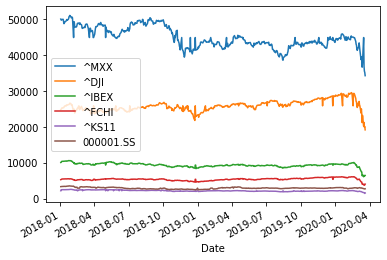

In [10]:
ts.plot()
plt.show()

In [11]:
rts = ts.pct_change().dropna()
returns = rts.copy() #toda la serie completa
rts.head()

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2018-01-03,-0.005031,0.003975,0.003661,0.008070,0.128900,0.006207
2018-01-04,-0.000755,0.006117,0.019613,0.015458,-0.008000,0.004928
2018-01-05,0.002877,0.008803,0.009404,0.010540,0.012593,0.001784
2018-01-08,0.002161,-0.000509,-0.001249,0.003047,0.006310,0.005227
2018-01-09,-0.005885,0.004066,0.002702,0.006655,-0.001214,0.001296


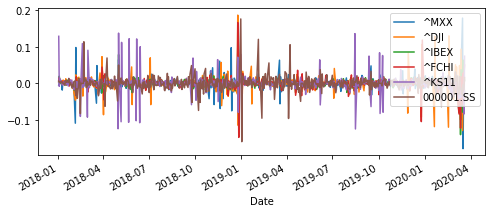

In [12]:
returns.plot(figsize=(8,3))

In [13]:
ts.corr()

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
^MXX,1.000000,-0.027559,0.715119,0.198490,0.798745,0.307628
^DJI,-0.027559,1.000000,0.301751,0.849865,-0.064376,0.165572
^IBEX,0.715119,0.301751,1.000000,0.598524,0.822767,0.551071
^FCHI,0.198490,0.849865,0.598524,1.000000,0.233708,0.391971
^KS11,0.798745,-0.064376,0.822767,0.233708,1.000000,0.563135
000001.SS,0.307628,0.165572,0.551071,0.391971,0.563135,1.000000


In [14]:
#condiciones de criterio
rts[rts>=0] = 1
rts[rts<0] = 0

In [15]:
rts = rts.astype(int)
rts

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2018-01-03,0,1,1,1,1,1
2018-01-04,0,1,1,1,0,1
2018-01-05,1,1,1,1,1,1
2018-01-08,1,0,0,1,1,1
2018-01-09,0,1,1,1,0,1
...,...,...,...,...,...,...
2020-03-16,1,0,0,0,0,0
2020-03-17,0,1,1,1,0,0
2020-03-18,0,0,0,0,0,0


In [16]:
#Filter Date of starting coronavirus
umbral_alto = rts[rts.index > '2020-02-28'] 
umbral_alto

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2020-03-02,1,1,1,1,1,1
2020-03-03,1,0,1,1,1,1
2020-03-04,1,1,1,1,1,1
2020-03-05,0,0,0,0,1,1
2020-03-06,0,0,0,0,0,0
2020-03-09,0,0,0,0,0,0
2020-03-10,1,1,0,0,1,1
2020-03-11,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0


In [17]:
def getprob(data,total_reg, columns):
    p_1 = np.array(list(map(lambda j: len(data[data>0][j].dropna())/total_reg,columns)))
    p_2 = 1 - p_1
    return p_1, p_2

In [18]:
#get probabilities p and 1-p
umbral_bajo = rts[ rts.index <= '2020-02-28']
reg_b = len(umbral_bajo)
p_b1, p_b2 = getprob(umbral_bajo,reg_b,col_names) #probabilities before the date
p_b1 #p_1 probabilidad de que suba

array([0.47771836, 0.55793226, 0.51871658, 0.53832442, 0.53832442,
       0.52762923])

In [19]:
reg_a = len(umbral_alto)
p_a1, p_a2 = getprob(umbral_alto,reg_a,col_names) #probabilities before the date
p_a1 #p_1 probabilidad de que suba

array([0.4       , 0.4       , 0.46666667, 0.46666667, 0.4       ,
       0.4       ])

In [20]:
probs = pd.DataFrame({'ub_p1':p_b1,'ua_p1':p_a1,'ub_p2':p_b2,'ua_p2':p_a2},index=col_names)
probs

,ub_p1,ua_p1,ub_p2,ua_p2
^MXX,0.477718,0.400000,0.522282,0.600000
^DJI,0.557932,0.400000,0.442068,0.600000
^IBEX,0.518717,0.466667,0.481283,0.533333
^FCHI,0.538324,0.466667,0.461676,0.533333
^KS11,0.538324,0.400000,0.461676,0.600000
000001.SS,0.527629,0.400000,0.472371,0.600000


In [21]:
#cantidad de días a simular 
umbral_alto.head()

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2020-03-02,1,1,1,1,1,1
2020-03-03,1,0,1,1,1,1
2020-03-04,1,1,1,1,1,1
2020-03-05,0,0,0,0,1,1
2020-03-06,0,0,0,0,0,0


In [22]:
umbral_alto.shape

(15, 6)

In [23]:
#párametros de la distribución
n = 15; 

m = np.arange(0,n)
n = n*np.ones(len(m))
m,n

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15.]))

índice: ^MXX


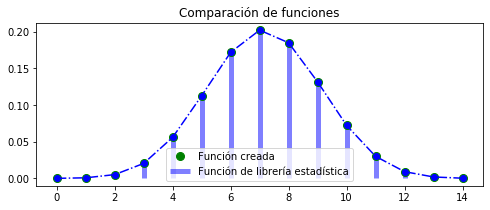

índice: ^DJI


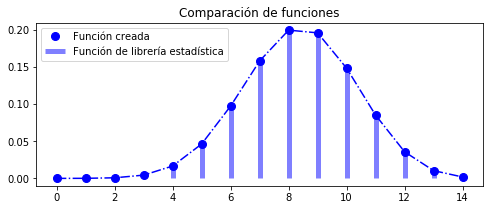

índice: ^IBEX


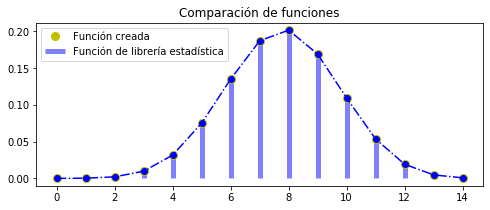

índice: ^FCHI


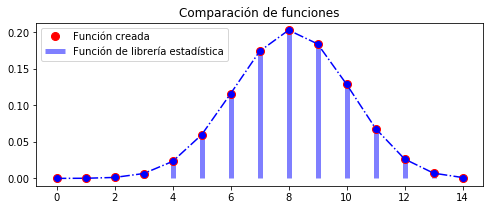

índice: ^KS11


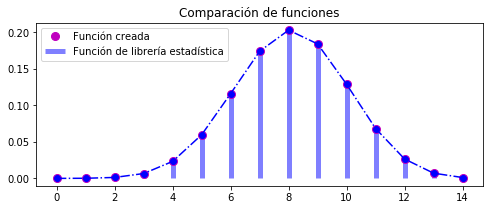

índice: 000001.SS


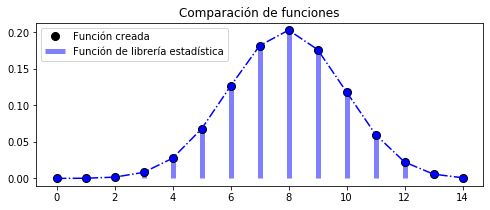

In [24]:
# Distribución binomial creada
long = range(0,len(col_names))
P = list(map(lambda p:comb(n,m)*p_b1[p]**m*(1-p_b1[p])**(n-m),long))
#[comb(n,m)*p_b1[j]**m*(1-p_b1[j])**(n-m) for j in range(len(p_b1))]

# Distribución binomial del paquete de estadística
P2 = list(map(lambda p : st.binom(n,p_b1[p]).pmf(m),long))

# Comparación de función creada con función de python
color = ['go','bo','yo','ro','mo','ko']
for j in long:
    print("índice:",col_names[j])
    plt.figure(figsize=(8,3))
    plt.plot(P[j],color[j], ms=8,label='Función creada')
    plt.plot(P[j],'o-.b')
    plt.vlines(m,0,P2[j], colors='b', lw=5, alpha=0.5,label='Función de librería estadística')
    plt.legend()
    plt.title('Comparación de funciones')
    plt.show()
#[plt.stem(P2[w],label='Función de librería estadística') for w in long]
#plt.legend()
#plt.title('Comparación de funciones')


Máximo p1: 7 prob1: 0.478
Máximo p2: 8 prob2: 0.522


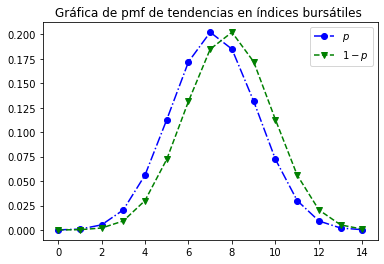

Máximo p1: 8 prob1: 0.558
Máximo p2: 7 prob2: 0.442


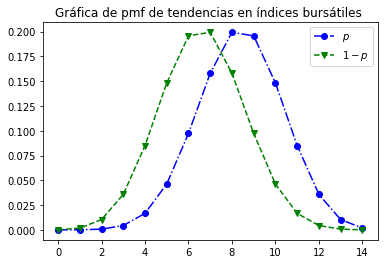

Máximo p1: 8 prob1: 0.519
Máximo p2: 7 prob2: 0.481


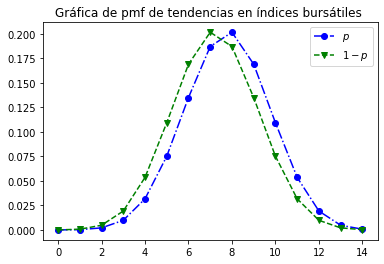

Máximo p1: 8 prob1: 0.538
Máximo p2: 7 prob2: 0.462


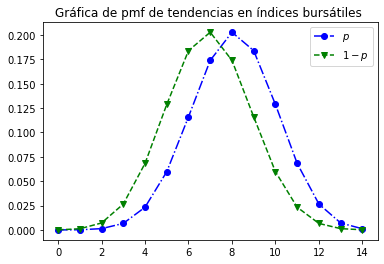

Máximo p1: 8 prob1: 0.538
Máximo p2: 7 prob2: 0.462


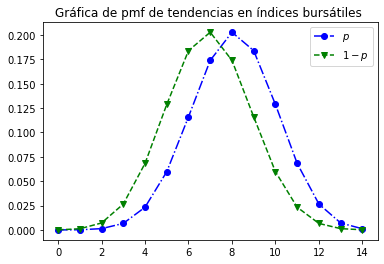

Máximo p1: 8 prob1: 0.528
Máximo p2: 7 prob2: 0.472


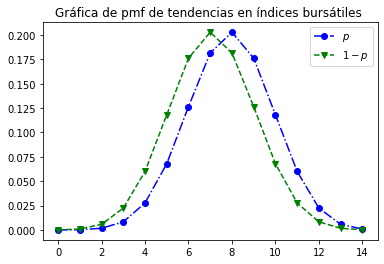

In [25]:
# Grafica de pmf para el problema de costo de activos   
idx_p1 = np.zeros(len(col_names)).astype(int)
idx_p2 = np.zeros(len(col_names)).astype(int)
for t in long:
    p1 = str("{:.3f}".format(p_b1[t]))
    p2 = str("{:.3f}".format(p_b2[t]))
    print("Máximo p1:",np.argmax(P[t]), "prob1:",p1)
    idx_p1[t] = np.argmax(P[t])
    plt.plot(P[t],'o-.b',label='$p$')
    print("Máximo p2:",np.argmax(st.binom(n,p_b2[t]).pmf(m)),"prob2:",p2)
    plt.plot(st.binom(n,p_b2[t]).pmf(m),'gv--',label='$1-p$')
    idx_p2[t] = np.argmax(st.binom(n,p_b2[t]).pmf(m))
    plt.title('Gráfica de pmf de tendencias en índices bursátiles ')
    plt.legend(loc='best')
    plt.show()


In [26]:
max_p1 = list(map(lambda j : P[j].max(),long))
max_p2 = list(map(lambda j : P2[j].max(),long))
max_p1

[0.20229733121748922,
 0.1993526892138863,
 0.20174180092201308,
 0.20288947792669682,
 0.20288947792669682,
 0.20284319307990498]

In [27]:
#indices de los días que tienen la mayor prob de subir o bajar 
idx_p1 , idx_p2

(array([7, 8, 8, 8, 8, 8]), array([8, 7, 7, 7, 7, 7]))

In [28]:
umbral_alto

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2020-03-02,1,1,1,1,1,1
2020-03-03,1,0,1,1,1,1
2020-03-04,1,1,1,1,1,1
2020-03-05,0,0,0,0,1,1
2020-03-06,0,0,0,0,0,0
2020-03-09,0,0,0,0,0,0
2020-03-10,1,1,0,0,1,1
2020-03-11,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0


In [29]:
real_p1 = list(map(lambda w: umbral_alto[col_names[w]][idx_p1[w]-1],long))
real_p2 = list(map(lambda w: umbral_alto[col_names[w]][idx_p2[w]-1],long))
real_p1 , real_p2

([1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 1])

In [30]:
unos = np.ones(len(col_names)).astype(int)
ceros = np.zeros(len(col_names)).astype(int)

In [31]:
teo_real = (pd.DataFrame({'idx_p1': idx_p1, 'valor_teop1': unos.astype(int), 'valor_realp1':real_p1,
              'idx_p':idx_p2,'valor_teop2': ceros.astype(int), 'valor_realp2': real_p2} , index=col_names))
teo_real['resultsp1'] = teo_real['valor_teop1']-teo_real['valor_realp1']
teo_real['resultsp2'] = teo_real['valor_teop2']-teo_real['valor_realp2']
teo_real

,idx_p1,valor_teop1,valor_realp1,idx_p,valor_teop2,valor_realp2,resultsp1,resultsp2
^MXX,7,1,1,8,0,0,0,0
^DJI,8,1,0,7,0,1,1,-1
^IBEX,8,1,0,7,0,0,1,0
^FCHI,8,1,0,7,0,0,1,0
^KS11,8,1,0,7,0,1,1,-1
000001.SS,8,1,0,7,0,1,1,-1


## Ajuste de curva Chi Cuadrada

$$ \chi^2 = \sum \frac{(f_0-f_e)^2}{f_e}=2.764$$

In [32]:
#### Método chi cuadrado para valor
F_obse = teo_real['valor_teop1']
F_espe = teo_real['valor_realp1']

x2 = st.chisquare(F_obse,F_espe,ddof=3)
print('Valor de chi cuadrado = ',list(x2)[0],',p-value de la prueba=',list(x2)[1])

Ji = st.chi2.ppf(q = 0.99,df=3)
print('Estadístico de Ji = ',Ji)

Valor de chi cuadrado =  inf ,p-value de la prueba= 0.0
Estadístico de Ji =  11.344866730144373


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


- Dado que el valor de $p-value$ es mucho menor que el nivel de significancia $\alpha$, es decir: $p-value$ < $\alpha$, por lo tanto rechazamos la $H_0$.
- Como conclución se establece que la distribución binomial no es una distribución chi cuadrada.

## Nodo 2: Ajuste a curva normal

In [33]:
data = ts.pct_change().dropna()
data.describe()

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,-0.000469,-0.000183,-0.000670,-0.000320,-0.000269,-0.000144
std,0.019339,0.023072,0.014443,0.016866,0.025473,0.020091
min,-0.178896,-0.129265,-0.140592,-0.148063,-0.124989,-0.159783
25%,-0.006346,-0.004187,-0.005026,-0.004166,-0.005797,-0.006481
50%,-0.000474,0.000918,0.000200,0.000701,0.000352,0.000000
75%,0.005510,0.006088,0.005371,0.005599,0.005694,0.006264
max,0.178790,0.186972,0.102636,0.166747,0.137645,0.176518


In [34]:
Index_MXX = data.iloc[:,0:1]
Index_SS = data.iloc[:,1:2]
Index_DJI = data.iloc[:,2:3]
Index_IBEX = data.iloc[:,3:4]
Index_FCHI = data.iloc[:,4:5]
Index_KS11 = data.iloc[:,5:6]
mu_r = np.sum(np.mean(returns))/6
std_r= np.sum(np.std(returns))/6

In [35]:
MXX = np.asarray(Index_MXX)
SS = np.asarray(Index_SS)
DJI = np.asarray(Index_DJI)
IBEX = np.asarray(Index_IBEX)
FCHI = np.asarray(Index_FCHI)
KS11 = np.asarray(Index_KS11)

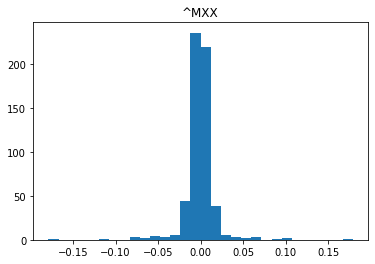

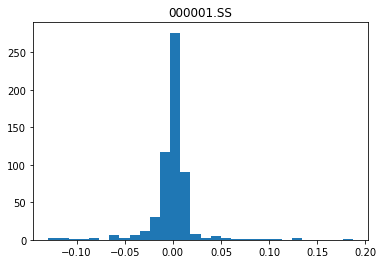

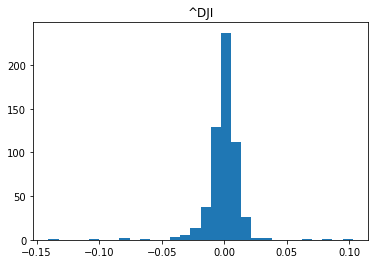

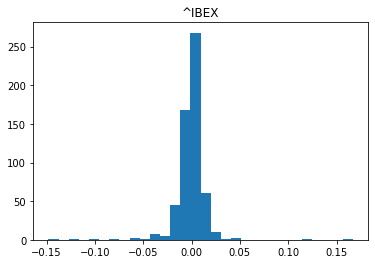

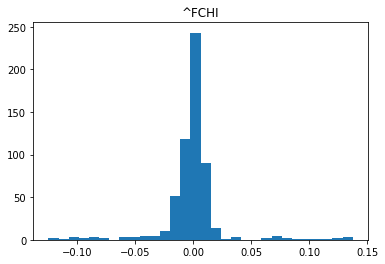

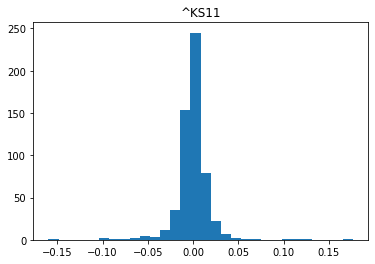

In [36]:
plt.hist(MXX,bins=30)
plt.title('^MXX')
plt.show()
plt.hist(SS,bins=30)
plt.title('000001.SS')
plt.show()
plt.hist(DJI,bins=30)
plt.title('^DJI')
plt.show()
plt.hist(IBEX,bins=30)
plt.title('^IBEX')
plt.show()
plt.hist(FCHI,bins=30)
plt.title('^FCHI')
plt.show()
plt.hist(KS11,bins=30)
plt.title('^KS11')
plt.show()

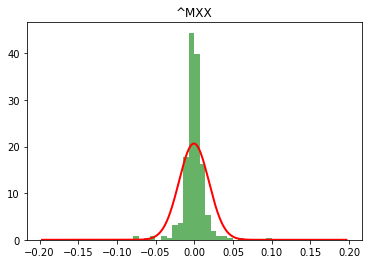

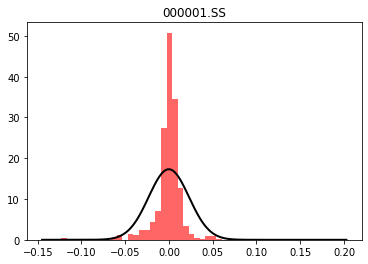

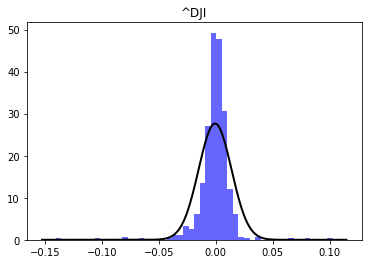

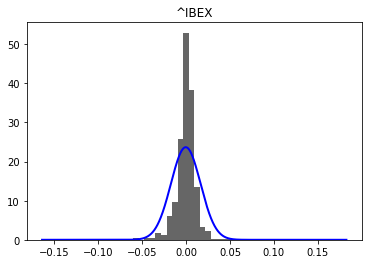

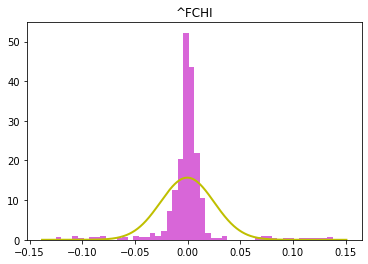

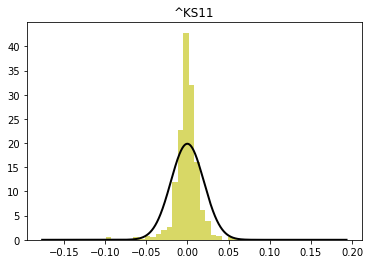

In [37]:
mu_M,std_M = norm.fit(MXX)
plt.hist(MXX,bins=50,density=True,alpha=0.6,color='g')
xmin_M,xmax_M = plt.xlim()
x_M = np.linspace(xmin_M,xmax_M,10000)
p_M = norm.pdf(x_M,mu_M,std_M)
plt.plot(x_M,p_M,'r',linewidth=2)
plt.title('^MXX')
plt.show()

mu_SS,std_SS = norm.fit(SS)
plt.hist(SS,bins=50,density=True,alpha=0.6,color='r')
xmin_SS,xmax_SS = plt.xlim()
x_SS = np.linspace(xmin_SS,xmax_SS,10000)
p_SS = norm.pdf(x_SS,mu_SS,std_SS)
plt.plot(x_SS,p_SS,'k',linewidth=2)
plt.title('000001.SS')
plt.show()

mu_DJI,std_DJI = norm.fit(DJI)
plt.hist(DJI,bins=50,density=True,alpha=0.6,color='b')
xmin_DJI,xmax_DJI = plt.xlim()
x_DJI = np.linspace(xmin_DJI,xmax_DJI,10000)
p_DJI = norm.pdf(x_DJI,mu_DJI,std_DJI)
plt.plot(x_DJI,p_DJI,'k',linewidth=2)
plt.title('^DJI')
plt.show()

mu_IBEX,std_IBEX = norm.fit(IBEX)
plt.hist(IBEX,bins=50,density=True,alpha=0.6,color='k')
xmin_IBEX,xmax_IBEX = plt.xlim()
x_IBEX = np.linspace(xmin_IBEX,xmax_IBEX,10000)
p_IBEX = norm.pdf(x_IBEX,mu_IBEX,std_IBEX)
plt.plot(x_IBEX,p_IBEX,'b',linewidth=2)
plt.title('^IBEX')
plt.show()

mu_FC,std_FC = norm.fit(FCHI)
plt.hist(FCHI,bins=50,density=True,alpha=0.6,color='m')
xmin_FC,xmax_FC = plt.xlim()
x_FC = np.linspace(xmin_FC,xmax_FC,10000)
p_FC = norm.pdf(x_FC,mu_FC,std_FC)
plt.plot(x_FC,p_FC,'y',linewidth=2)
plt.title('^FCHI')
plt.show()

mu_KS,std_KS = norm.fit(KS11)
plt.hist(KS11,bins=50,density=True,alpha=0.6,color='y')
xmin_KS,xmax_KS = plt.xlim()
x_KS = np.linspace(xmin_KS,xmax_KS,10000)
p_KS = norm.pdf(x_KS,mu_KS,std_KS)
plt.plot(x_KS,p_KS,'k',linewidth=2)
plt.title('^KS11')
plt.show()

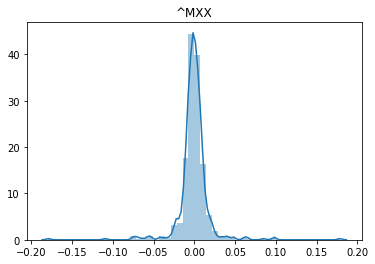

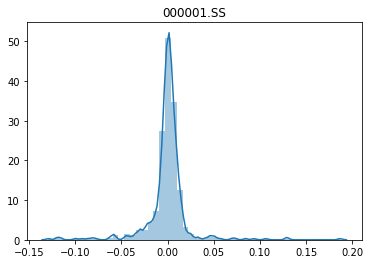

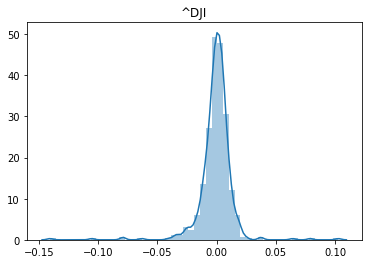

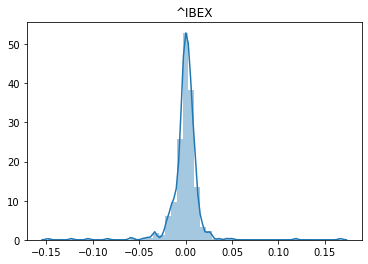

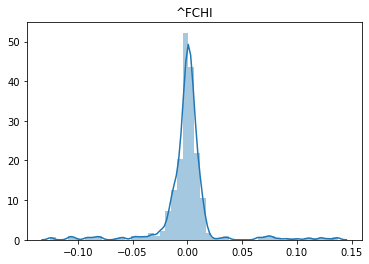

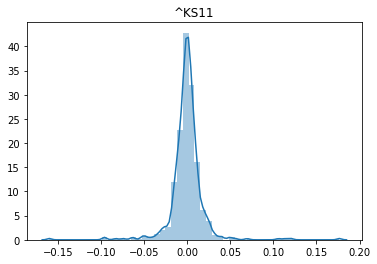

In [38]:
sns.distplot(MXX)
plt.title('^MXX')
plt.show()
sns.distplot(SS)
plt.title('000001.SS')
plt.show()
sns.distplot(DJI)
plt.title('^DJI')
plt.show()
sns.distplot(IBEX)
plt.title('^IBEX')
plt.show()
sns.distplot(FCHI)
plt.title('^FCHI')
plt.show()
sns.distplot(KS11)
plt.title('^KS11')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

<Figure size 864x576 with 0 Axes>

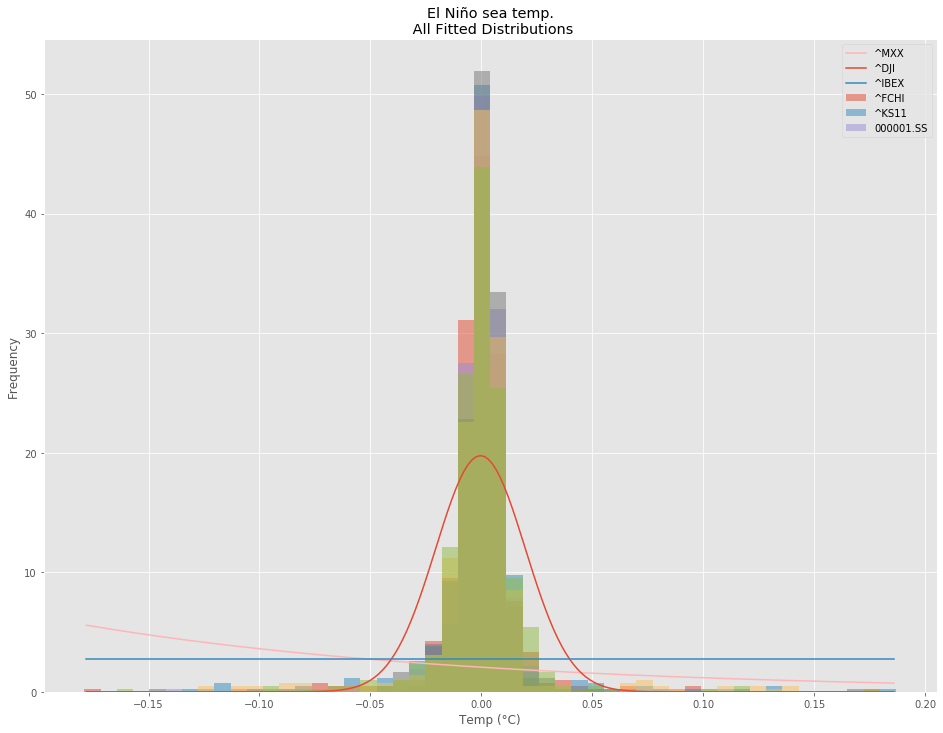

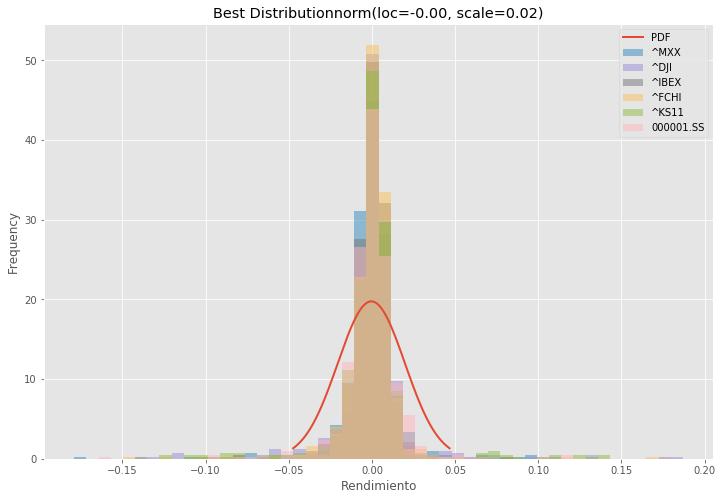

In [39]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind = 'hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Best Distribution' + dist_str)
ax.set_xlabel(u'Rendimiento')
ax.set_ylabel('Frequency')

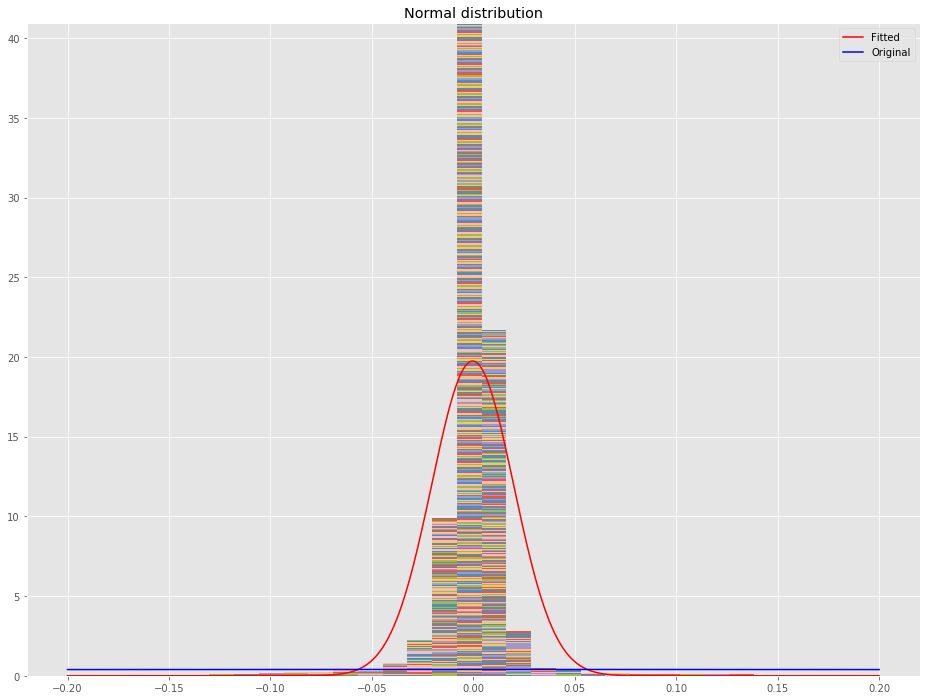

Media encontrada usando MLE= -0.000342418022479948 , 
Std encontrada usando MLE= 0.02019834839651748
Media obtenida usando la media muestral= -0.00034241802247994796 , 
Std obtenida usando la std muestral= 0.019863459123533014


In [40]:
param = st.norm.fit(data)
# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-0.20,0.20,576)
pdf_fitted = st.norm.pdf(x,loc=param[0],scale=param[1])
pdf = st.norm.pdf(x)

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',label='Fitted')
plt.plot(x,pdf,'b-',label='Original')
plt.legend()
plt.hist(data,bins=30,density=True,alpha=.9,stacked=True)
plt.show()

print('Media encontrada usando MLE=',param[0],', \nStd encontrada usando MLE=',param[1])

sigma_hat = std_r
mu_hat = mu_r
print('Media obtenida usando la media muestral=',mu_hat,', \nStd obtenida usando la std muestral=',sigma_hat)

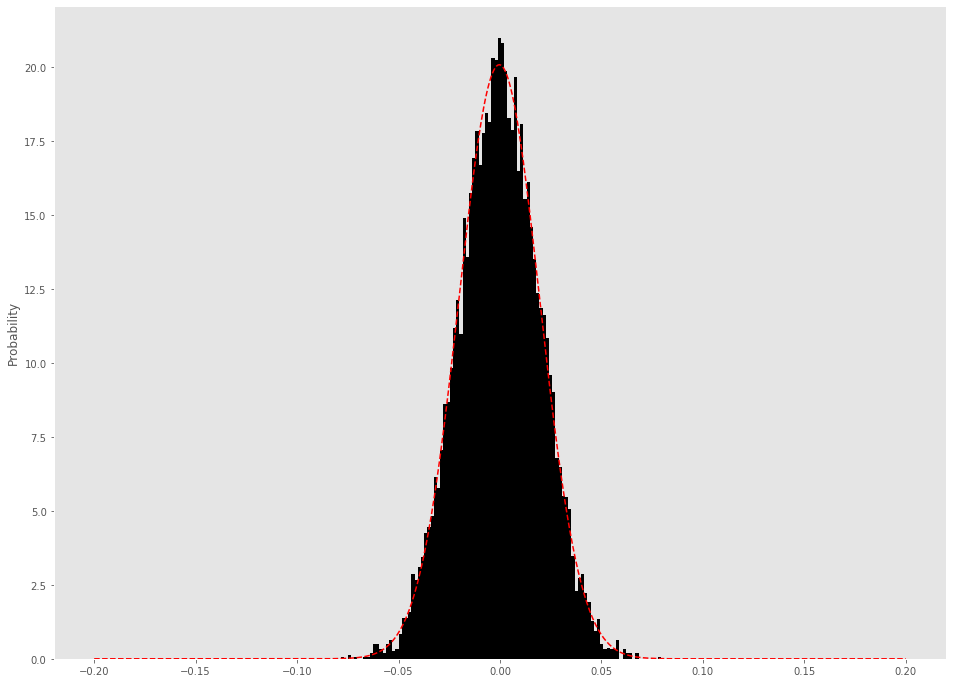

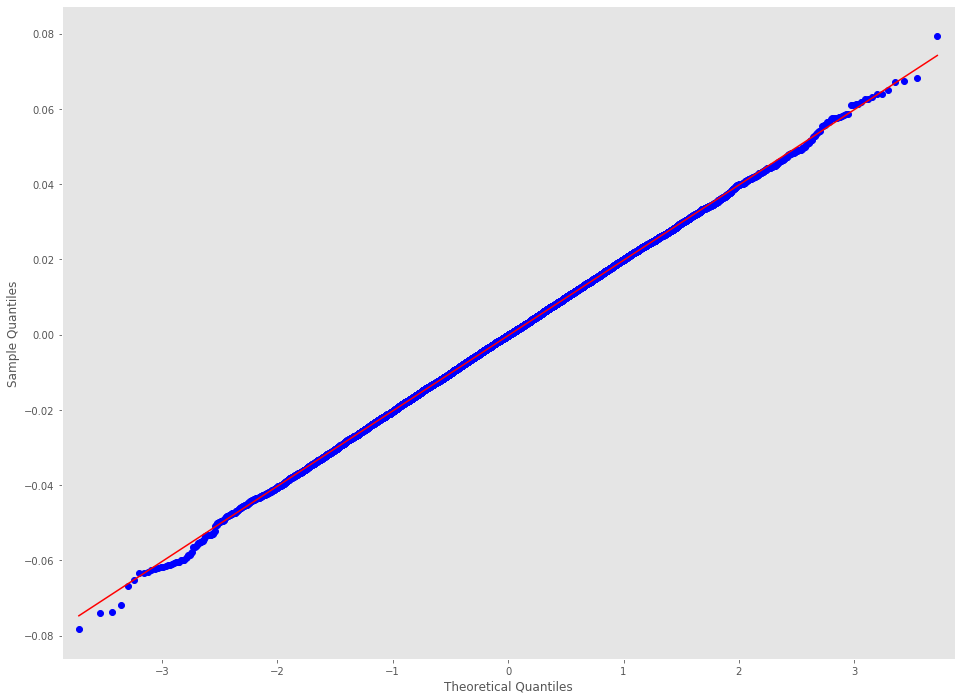

In [41]:
measurements = np.random.normal(loc = mu_r, scale = std_r, size=10000)   

# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True, color = 'k')
y = st.norm.pdf(x,loc = mu_r, scale = std_r)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
# grap2 = st.probplot(measurements, dist="norm", plot=plt)
grap1 = statsmodels.graphics.qqplot(measurements, dist='norm',line='s')
plt.grid()
# plt.xlabel('Normal theorical quantiles')
# plt.ylabel('Data theorical quantiles')
plt.show()

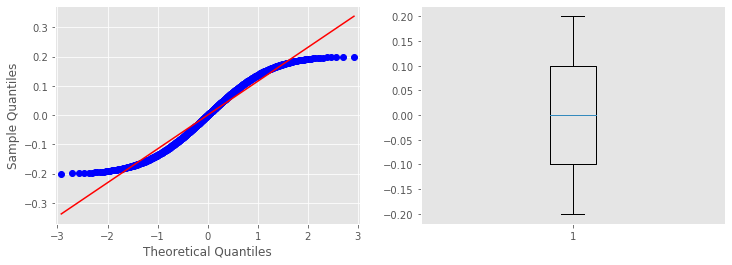

Quantiles random exponential de la muestra  [-0.1  0.   0.1]


In [42]:
lamb = 1


f,ax = plt.subplots(1,2,figsize=(12,4))

statsmodels.graphics.qqplot(x,dist='norm',line='s',ax = ax[0])
plt.title('Comparación de cuantiles exponenciales con normales')
plt.ylim([0,3])
plt.grid()
# plt.show()

# Gráfica box-plot
plt.subplot(122)
B = plt.boxplot(x)
plt.grid()
plt.show()

# Obtener los valores de Q1 y Q3 de la gráfica
[item.get_ydata()[0] for item in B['whiskers']]
# Otra forma de obtener los quantiles 
Q_exp = np.percentile(x,[25,50,75])

print('Quantiles random exponential de la muestra ',Q_exp)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es normal con ´media= $\mu$´ y ´desviación estándar = $\sigma$´

> $H_a$: los datos no se distribuyen normales

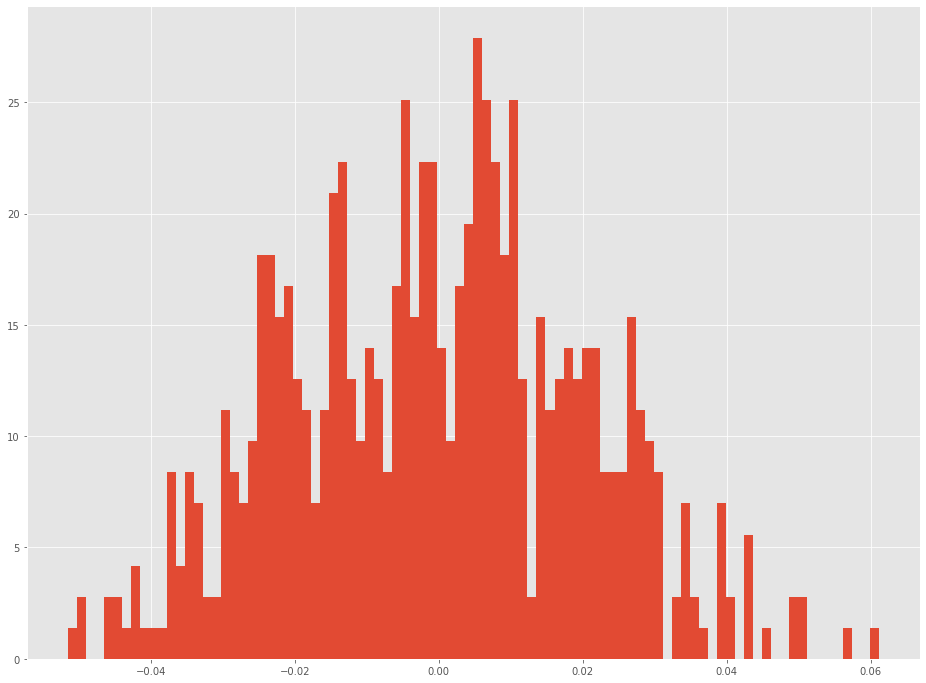

media mu =0.004191, desviación estándar muestral =0.032548


In [43]:
mu_real = mu_r; sigma_real = std_r
N = 572 # Cantidad de muestras
n1 = np.random.normal(mu_real,sigma_real,N)
J = 90 # Cantidad de particiones del histograma
[freq,x_J,p]=plt.hist(n1,J,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_J = x_J[:-1] 

# Media y desviación estándar muestral
mu_J = np.mean(x_J)
sigma_J = np.std(x_J)
print('media mu =%f, desviación estándar muestral =%f'%(mu_J,sigma_J))

In [44]:
pi = st.norm.pdf(x_J,loc=mu_J,scale=sigma_J)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_J*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2) 

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 6 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mu_J,'\nDesviación estándar muestral = ',sigma_J)

Valor de chi cuadrado teorico  =  -97781.10582907624
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=-97781.10582907624, pvalue=1.0)
Estadístico de chi_cuadrado =  105.26717729686034
Media muestral =  0.004191172109053605 
Desviación estándar muestral =  0.03254807832518694


> **Conclusión**: No podemos rechazar la $H_0$ por lo tanto los datos distribuyen normales.

## Nodo 3: Simulación montecarlo

In [45]:
tsa = ts.reset_index()
tsa

,Date,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
0,2018-01-02,50033.949219,24824.009766,10079.099609,5288.600098,2202.452882,3348.325928
1,2018-01-03,49782.230469,24922.679688,10116.000000,5331.279785,2486.350098,3369.107910
2,2018-01-04,49744.621094,25075.130859,10314.400391,5413.689941,2466.459961,3385.709961
3,2018-01-05,49887.738281,25295.869141,10411.400391,5470.750000,2497.520020,3391.750000
4,2018-01-08,49995.570312,25283.000000,10398.400391,5487.419922,2513.280029,3409.479980
...,...,...,...,...,...,...,...
572,2020-03-16,44894.266025,20188.519531,6107.200195,3881.459961,1714.859985,2789.253906
573,2020-03-17,36862.839844,21237.380859,6498.500000,3991.780029,1672.439941,2779.641113
574,2020-03-18,35532.738281,19898.919922,6274.799805,3754.840088,1591.199951,2728.756104
575,2020-03-19,35143.628906,20087.189453,6395.799805,3855.500000,1457.640015,2702.129883


In [46]:
mu = list(map(lambda x : rts[x].mean(),col_names))
mu

[0.4756944444444444,
 0.5538194444444444,
 0.5173611111111112,
 0.5364583333333334,
 0.5347222222222222,
 0.5243055555555556]

In [47]:
sigma = list(map(lambda x : rts[x].std(),col_names))
sigma


[0.4998429705108211,
 0.497527097312683,
 0.5001328325970473,
 0.49910245528304614,
 0.4992264547678684,
 0.499842970510821]

In [48]:
ndays = 30
nscen = 10
indices = np.arange(tsa.index[-1]+1,tsa.index[-1]+1+ndays)

In [49]:
pd.DataFrame(sigma[0]*np.random.randn(ndays,nscen)+mu[0], index=np.arange(tsa.index[-1]+1,tsa.index[-1]+1+ndays))

,0,1,2,3,4,5,6,7,8,9
577,0.625140,1.469266,0.571787,-0.120510,1.092116,-0.138742,0.088073,0.058048,0.480859,-0.454871
578,0.102885,0.216394,0.753342,0.042671,0.567022,0.507021,0.888094,0.256918,-0.150773,0.657501
579,0.846747,0.561444,1.363248,1.039163,0.211695,0.254267,0.338326,0.295906,0.372207,0.504417
580,0.992164,0.406513,1.248756,0.823202,-0.466654,0.224849,0.925656,0.712315,-0.250241,0.237718
581,1.307906,0.935098,0.437767,0.502659,1.111502,1.034622,0.695140,0.964434,-0.588016,0.636790
582,0.394844,1.294444,0.285475,0.853865,1.296570,0.512898,0.313183,1.433430,0.812531,0.636522
583,0.196126,0.824053,0.499879,0.035647,-0.130474,0.069150,0.817370,0.212459,0.503325,0.155080
584,-0.061740,-0.151764,0.245841,0.411617,1.679531,0.364413,-0.372529,-0.146904,0.765894,0.565868
585,1.283019,0.475341,-0.256108,0.485007,0.077413,0.571950,0.101958,0.837899,-0.110661,0.939971
586,0.568245,0.982963,0.039608,-0.234424,0.356837,0.076875,0.447735,0.175390,1.231384,0.928463


In [50]:
sim_ret = [pd.DataFrame(sigma[i]*np.random.randn(ndays,nscen)+mu[i], index=np.arange(tsa.index[-1]+1,tsa.index[-1]+1+ndays)) for i in long]
sim_ret

[            0         1         2         3         4         5         6  \
 577  0.979629  0.179685  0.172435  0.461451  1.578663  0.788487  0.371335   
 578 -0.675425  1.079146  0.530957  0.337249  0.200588  0.295918 -0.011330   
 579  0.304106  0.417923 -0.098138  0.525358  0.252328 -0.091615 -0.490858   
 580  0.180406  0.560081  0.649616  0.331100  0.516858  0.441681  0.362589   
 581  0.212082  0.102089  1.389592  0.062830  0.929182  0.319016  0.062770   
 582  0.087094  0.620284 -0.415217 -0.073591  0.758370  0.937146 -0.296568   
 583  0.661479  0.028202  1.077021  1.498601  0.011055  1.357248  0.370351   
 584  0.902429  0.624684  1.135484 -0.153237  0.230729  0.203756 -0.001286   
 585  1.512958  0.846547  0.914030  0.367481  0.592470  0.584070  0.033057   
 586  0.585829 -0.060992  1.179700  0.223706  0.924697  0.273250  0.661369   
 587  0.531260  0.924293  0.874129  0.328361  0.281430  0.597452  0.576365   
 588  1.677791  0.170320  0.158212  0.200117  0.370108  0.735200

In [51]:
(np.ones(10)*ts['^MXX'].iloc[-1])*np.exp(sim_ret[0].cumsum())

,0,1,2,3,4,5,6,7,8,9
577,9.127573e+04,4.101515e+04,4.071884e+04,5.436426e+04,1.661547e+05,7.539515e+04,4.967944e+04,8.052964e+04,5.233102e+04,3.332211e+04
578,4.645387e+04,1.206733e+05,6.924481e+04,7.616911e+04,2.030612e+05,1.013582e+05,4.911973e+04,1.601489e+05,4.197825e+04,6.775763e+04
579,6.296416e+04,1.832790e+05,6.277205e+04,1.288068e+05,2.613433e+05,9.248487e+04,3.006624e+04,1.170772e+05,5.642594e+04,9.586044e+04
580,7.541244e+04,3.208876e+05,1.201963e+05,1.793633e+05,4.382077e+05,1.438435e+05,4.320655e+04,1.769721e+05,5.380658e+04,2.452020e+05
581,9.322852e+04,3.553774e+05,4.823733e+05,1.909943e+05,1.109734e+06,1.978960e+05,4.600556e+04,3.344271e+05,6.579156e+04,2.192178e+05
582,1.017122e+05,6.608084e+05,3.184615e+05,1.774435e+05,2.369054e+06,5.051663e+05,3.419892e+04,5.843320e+05,8.122595e+04,8.341639e+05
583,1.970832e+05,6.797099e+05,9.349773e+05,7.941350e+05,2.395390e+06,1.962816e+06,4.952836e+04,6.569122e+05,3.750600e+05,3.362509e+06
584,4.859253e+05,1.269465e+06,2.910286e+06,6.813094e+05,3.017037e+06,2.406410e+06,4.946471e+04,1.865268e+06,3.154326e+05,4.418004e+06
585,2.206169e+06,2.959861e+06,7.259288e+06,9.838733e+05,5.456161e+06,4.315468e+06,5.112719e+04,4.188449e+06,1.137422e+06,4.340719e+06
586,3.963338e+06,2.784728e+06,2.361735e+07,1.230533e+06,1.375555e+07,5.671512e+06,9.905601e+04,9.480430e+06,1.750702e+06,2.195463e+06


In [52]:
col_names

array(['^MXX', '^DJI', '^IBEX', '^FCHI', '^KS11', '000001.SS'],
      dtype=object)

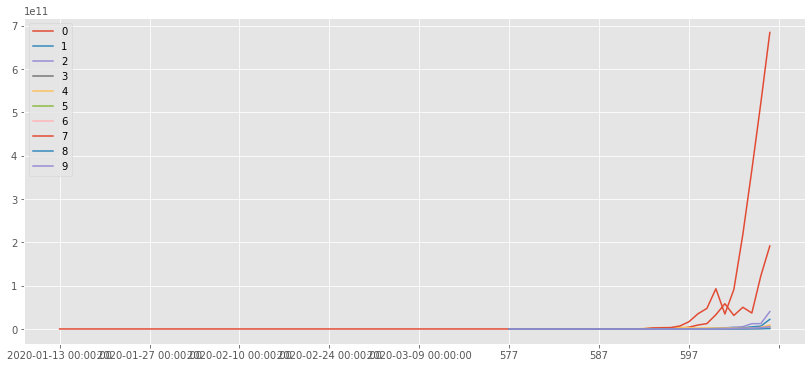

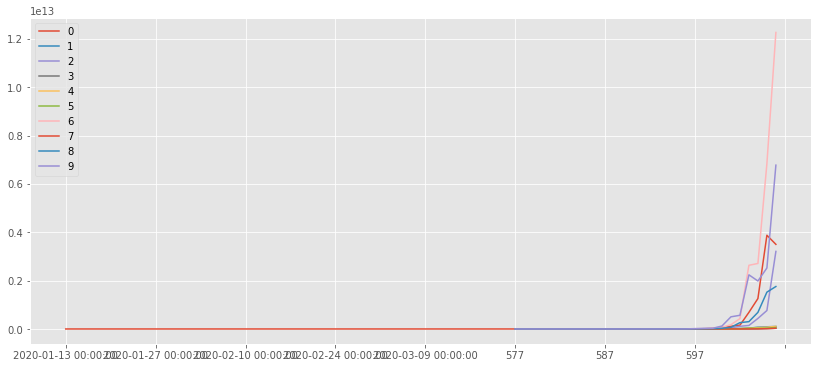

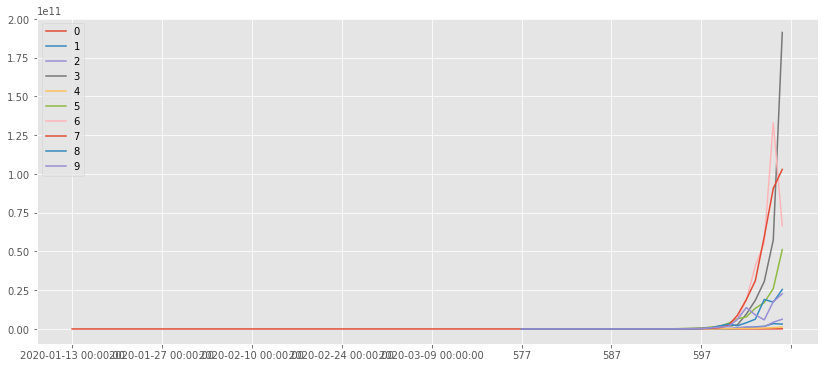

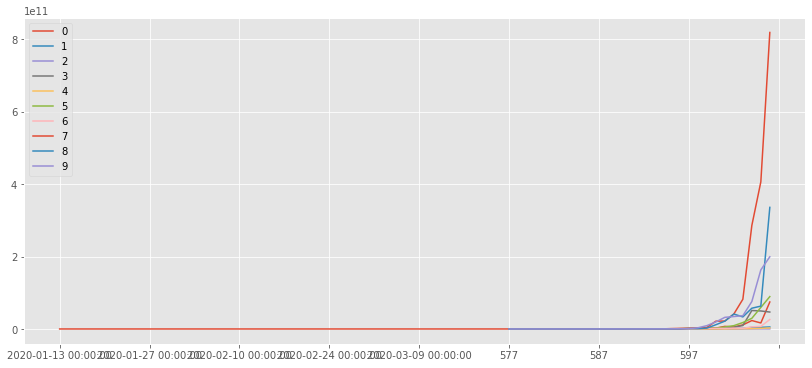

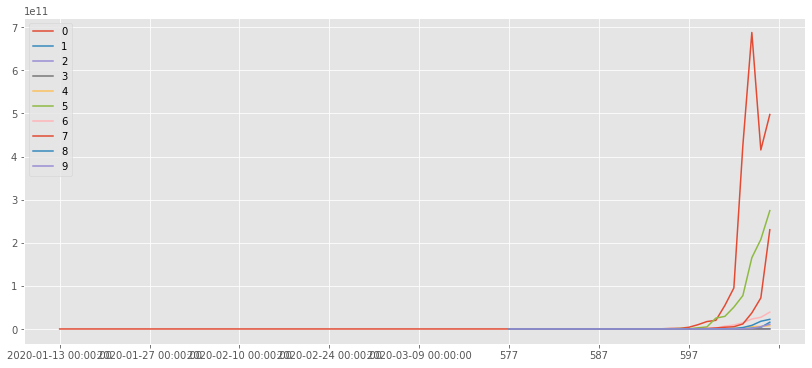

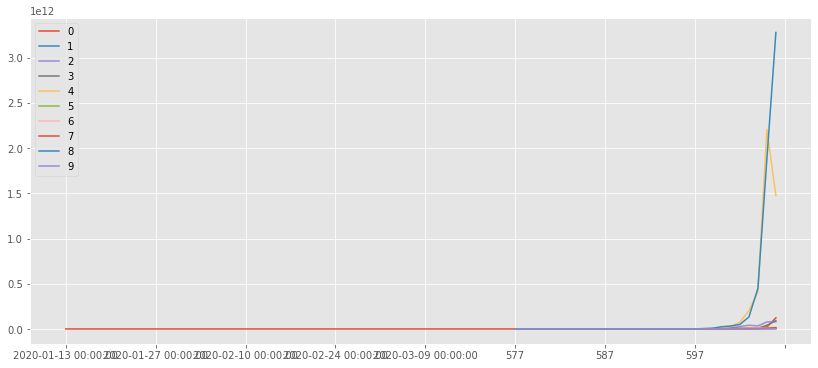

In [53]:
sim_closes_normal = [(ts[col_names[k]].iloc[-1])*np.exp(sim_ret[k].cumsum()) for k in long]
#Juntar los kernels simulados con la gráfica de los precios
[pd.concat([ts[col_names[s]].iloc[-50:],sim_closes_normal[s]]).plot(figsize=(14,6)) for s in long];
#sim_closes_normal.plot(figsize=(8,6),label=False);

## 3.2 Kernels

In [54]:
[KernelDensity(kernel='gaussian', bandwidth=0.001).fit(pd.DataFrame(returns[col_names[k]].values).rename(columns={k:'Name'})) for k in long]
 

[KernelDensity(algorithm='auto', atol=0, bandwidth=0.001, breadth_first=True,
               kernel='gaussian', leaf_size=40, metric='euclidean',
               metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.001, breadth_first=True,
               kernel='gaussian', leaf_size=40, metric='euclidean',
               metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.001, breadth_first=True,
               kernel='gaussian', leaf_size=40, metric='euclidean',
               metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.001, breadth_first=True,
               kernel='gaussian', leaf_size=40, metric='euclidean',
               metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.001, breadth_first=True,
               kernel='gaussian', leaf_size=40, metric='euclidean',
               metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth

In [55]:
kde = [KernelDensity(kernel='gaussian', bandwidth=0.001).fit(pd.DataFrame(returns[col_names[k]].values).rename(columns={k:'Name'})) for k in long]
ndays = 30
nscen = 10

In [56]:
ret = [kde[w].sample(n_samples=ndays*nscen, random_state=None) for w in long]
sim_ret_kernel = [pd.DataFrame(ret[w].reshape((ndays, nscen)),index=indices) for w in long]
sim_closes_kernel = [(ts[col_names[k]].iloc[-1])*np.exp(sim_ret_kernel[k].cumsum()) for k in long] #El último valor reportado

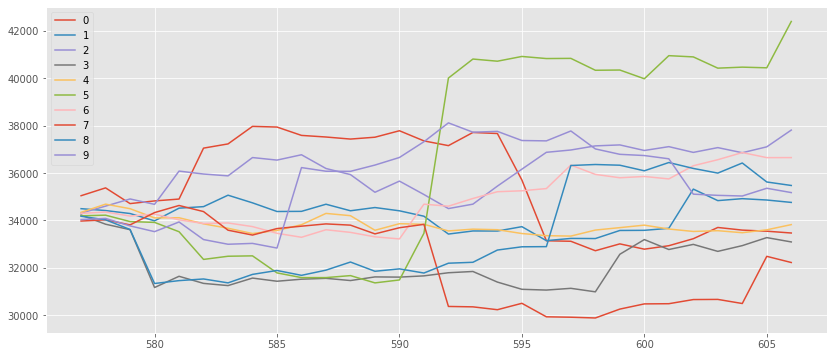

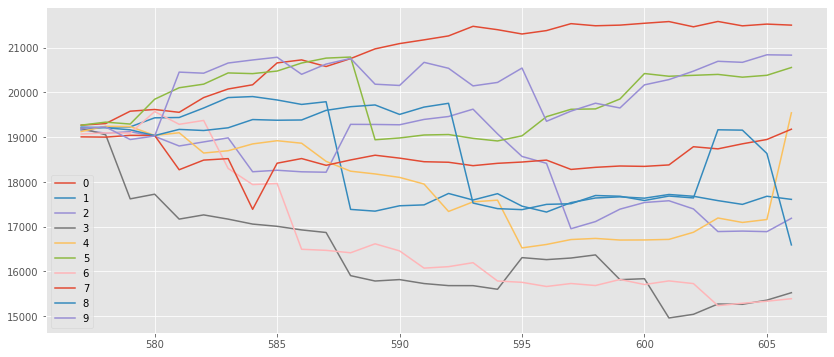

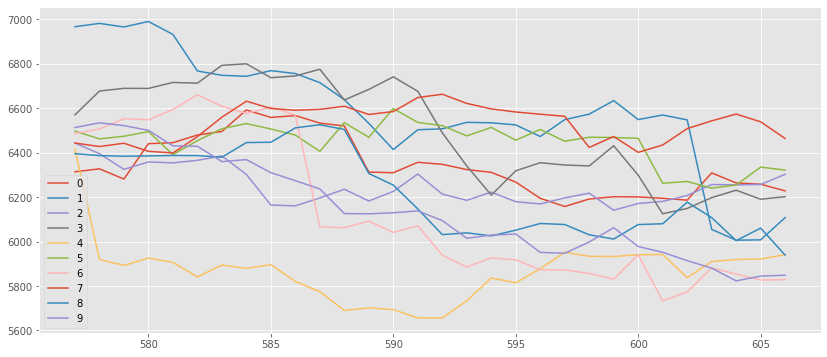

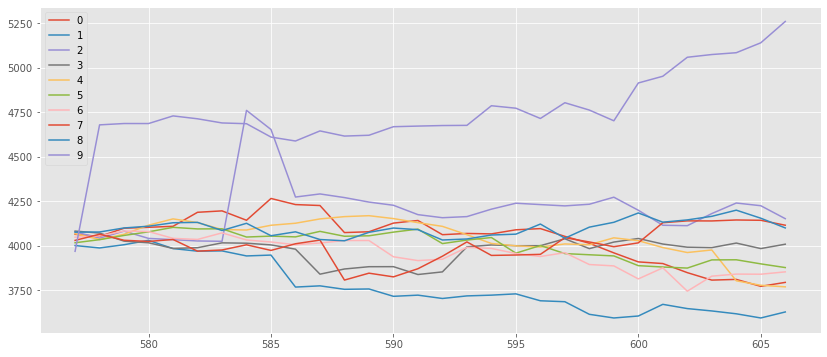

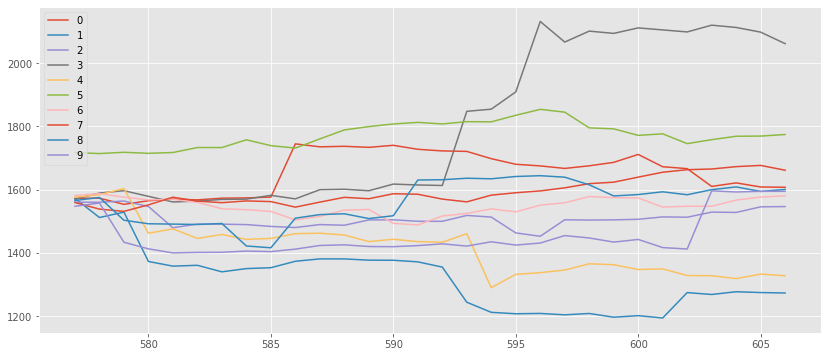

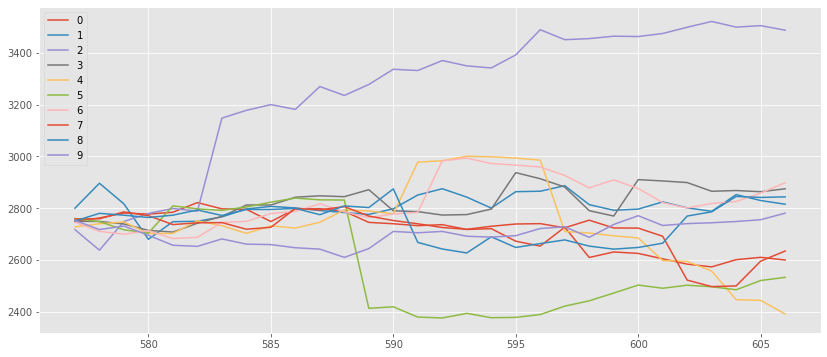

In [57]:
#Graficar los kernels simulados
[sim_closes_kernel[i].plot(figsize=(14,6)) for i in long]

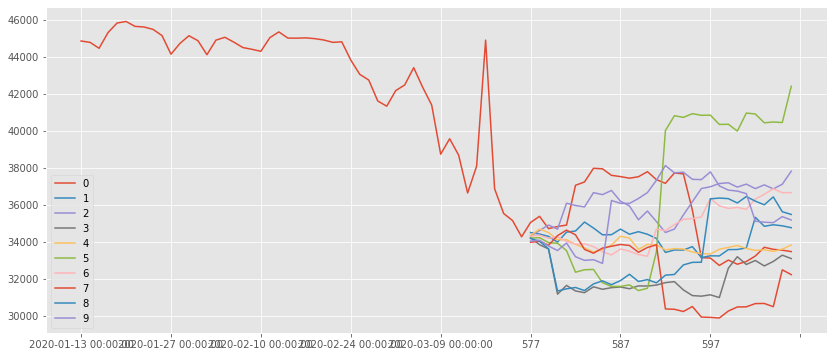

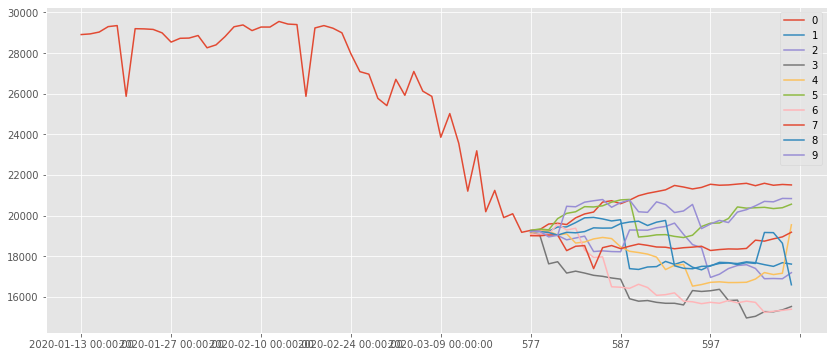

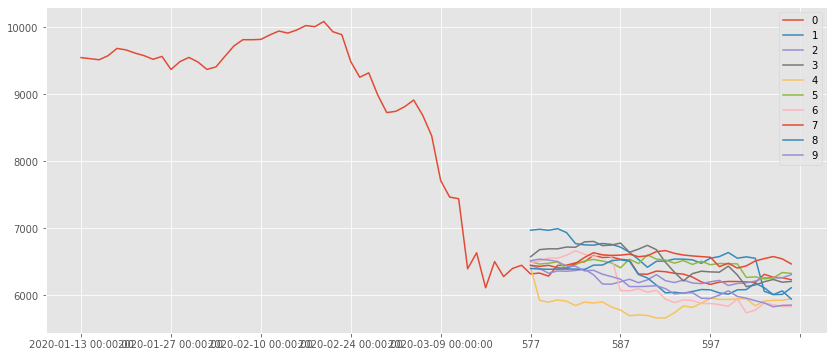

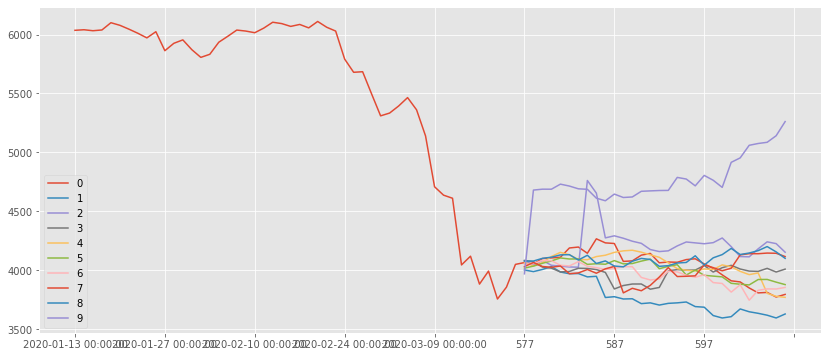

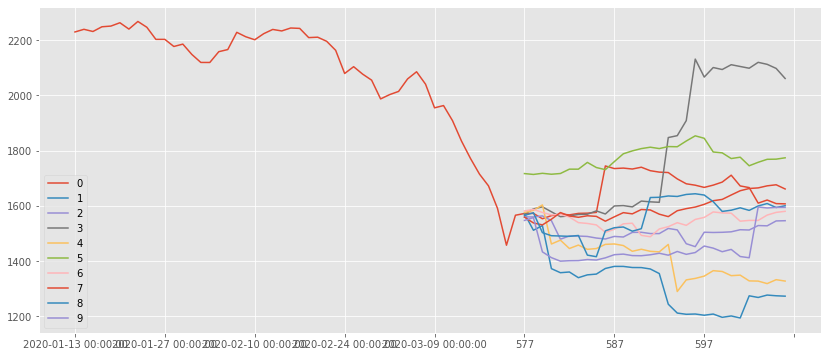

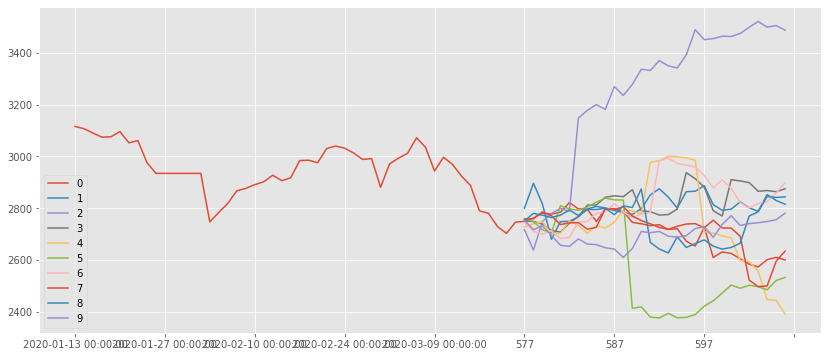

In [58]:
#Juntar los kernels simulados con la gráfica de los precios
[pd.concat([ts[col_names[values]].iloc[-50:],sim_closes_kernel[values]]).plot(figsize=(14,6)) for values in long]

In [59]:
np.random.seed(55555)
confianza = 0.95
X = list(map(lambda w: np.random.normal(mu[w],sigma[w],N),long))
i1 = [st.t.interval(confianza,len(X[prob])-1, loc=np.mean(X[prob]), scale=st.sem(X[prob])) for prob in long]
i2 = [st.norm.interval(confianza, loc=np.mean(X[prob]), scale=st.sem(X[prob])) for prob in long]
[print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1[k])) for k in long]
[print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2[i])) for i in long]
[print('Media calculada' ,np.mean(X[t])) for t in long]

Con una confianza de 0.95 la media estará en el intervalo t,
 (0.41065203577572185, 0.49085302836253775)
Con una confianza de 0.95 la media estará en el intervalo t,
 (0.5002845273454929, 0.5835440320023727)
Con una confianza de 0.95 la media estará en el intervalo t,
 (0.48441980795704714, 0.5638582070892305)
Con una confianza de 0.95 la media estará en el intervalo t,
 (0.47586593580111725, 0.5561869994887556)
Con una confianza de 0.95 la media estará en el intervalo t,
 (0.4933111217575126, 0.5777028065101777)
Con una confianza de 0.95 la media estará en el intervalo t,
 (0.48435231157399533, 0.5670935410312901)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (0.41073703477034496, 0.49076802936791464)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (0.5003727678268186, 0.583455791521047)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (0.4845039987362747, 0.5637740163100029)
Con una confianza de 0.95 la media estará en el inte

[None, None, None, None, None, None]

In [60]:
pd.DataFrame(i1,index=col_names).rename(columns={0:'liminf_t',1: 'limsup_t'})

,liminf_t,limsup_t
^MXX,0.410652,0.490853
^DJI,0.500285,0.583544
^IBEX,0.484420,0.563858
^FCHI,0.475866,0.556187
^KS11,0.493311,0.577703
000001.SS,0.484352,0.567094


In [61]:
pd.DataFrame(i2,index=col_names).rename(columns={0:'liminf_gau',1: 'limsup_gau'})

,liminf_gau,limsup_gau
^MXX,0.410737,0.490768
^DJI,0.500373,0.583456
^IBEX,0.484504,0.563774
^FCHI,0.475951,0.556102
^KS11,0.493401,0.577613
000001.SS,0.484440,0.567006


## Nodo 4: Coronavirus - caso 2

In [62]:
#Párametros para la función timeseries
#ticker = ['^MXX', '^DJI','^IBEX','^FCHI','^KS11','000001.SS']
ticker = ['^MXX','^DJI','^IBEX','^FCHI','^KS11','000001.SS']
source = 'yahoo'
start = '2020-03-21' #queda pendiente lo de poner más fechas
end = 'today'

In [63]:
ts2 = timeseries(ticker, source, start, end, 'Adj Close')
ts2.shape

(25, 6)

In [64]:
dqr(ts2)

,Nombres,Data_Types,missing_values,present_Values,Unique_Values,Min,Max
^MXX,^MXX,float64,3,22,22,32964.218750,35706.570312
^DJI,^DJI,float64,2,23,23,18591.929688,24242.490234
^IBEX,^IBEX,float64,3,22,22,6230.200195,7108.600098
^FCHI,^FCHI,float64,3,22,22,3914.310059,4543.580078
^KS11,^KS11,float64,1,24,24,1482.459961,1914.729980
000001.SS,000001.SS,float64,2,23,23,2660.169922,2852.552979


In [65]:
prom_val = ts2.mean().values
col_names = ts2.columns.values

In [66]:
ts2 = pd.DataFrame(list(map(lambda w,j: ts2[w].fillna(j),col_names,prom_val))).T
ts2

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2020-03-23,32964.218750,18591.929688,6230.200195,3914.310059,1482.459961,2660.169922
2020-03-24,34371.531250,20704.910156,6717.299805,4242.700195,1609.969971,2722.437988
2020-03-25,35536.699219,21200.550781,6942.399902,4432.299805,1704.760010,2781.591064
2020-03-26,35706.570312,22552.169922,7033.200195,4543.580078,1686.239990,2764.910889
2020-03-27,33799.488281,21636.779297,6777.899902,4351.490234,1717.729980,2772.202881
2020-03-30,34199.968750,22327.480469,6659.899902,4378.509766,1717.119995,2747.214111
2020-03-31,34554.531250,21917.160156,6785.399902,4396.120117,1754.640015,2750.295898
2020-04-01,33691.878906,20943.509766,6579.399902,4207.240234,1685.459961,2734.521973
2020-04-02,33590.621094,21413.439453,6574.100098,4220.959961,1724.859985,2780.637939


In [67]:
rts2 = ts2.pct_change().dropna()
returns2 = rts2.copy() #toda la serie completa
rts2

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2020-03-24,0.042692,0.113650,0.078184,0.083895,0.086012,0.023408
2020-03-25,0.033899,0.023938,0.033511,0.044688,0.058877,0.021728
2020-03-26,0.004780,0.063754,0.013079,0.025107,-0.010864,-0.005997
2020-03-27,-0.053410,-0.040590,-0.036299,-0.042277,0.018675,0.002637
2020-03-30,0.011849,0.031923,-0.017410,0.006209,-0.000355,-0.009014
2020-03-31,0.010367,-0.018377,0.018844,0.004022,0.021851,0.001122
2020-04-01,-0.024965,-0.044424,-0.030359,-0.042965,-0.039427,-0.005735
2020-04-02,-0.003005,0.022438,-0.000806,0.003261,0.023376,0.016864
2020-04-03,-0.015338,-0.016854,0.001141,-0.015726,0.000336,-0.005988


In [68]:
#condiciones de criterio
rts2[rts2>=0] = 1
rts2[rts2<0] = 0

In [69]:
rts2 = rts2.astype(int)
rts2

,^MXX,^DJI,^IBEX,^FCHI,^KS11,000001.SS
Date,,,,,,
2020-03-24,1,1,1,1,1,1
2020-03-25,1,1,1,1,1,1
2020-03-26,1,1,1,1,0,0
2020-03-27,0,0,0,0,1,1
2020-03-30,1,1,0,1,0,0
2020-03-31,1,0,1,1,1,1
2020-04-01,0,0,0,0,0,0
2020-04-02,0,1,0,1,1,1
2020-04-03,0,0,1,0,1,0


In [70]:
#get probabilities p and 1-p
reg_b = len(rts2)
p_1, p_2 = getprob(rts2,reg_b,col_names) #probabilities before the date
p_1, p_2 #p_1 probabilidad de que suba

(array([0.625     , 0.58333333, 0.58333333, 0.66666667, 0.625     ,
        0.54166667]),
 array([0.375     , 0.41666667, 0.41666667, 0.33333333, 0.375     ,
        0.45833333]))

In [71]:
probs

,ub_p1,ua_p1,ub_p2,ua_p2
^MXX,0.477718,0.400000,0.522282,0.600000
^DJI,0.557932,0.400000,0.442068,0.600000
^IBEX,0.518717,0.466667,0.481283,0.533333
^FCHI,0.538324,0.466667,0.461676,0.533333
^KS11,0.538324,0.400000,0.461676,0.600000
000001.SS,0.527629,0.400000,0.472371,0.600000


In [72]:
probs2 = pd.DataFrame({'p': p_1,'1-p':p_2},index=col_names)
probs2

,p,1-p
^MXX,0.625000,0.375000
^DJI,0.583333,0.416667
^IBEX,0.583333,0.416667
^FCHI,0.666667,0.333333
^KS11,0.625000,0.375000
000001.SS,0.541667,0.458333


In [73]:
#párametros de la distribución para simular los siugientes 30 días
n = 30; 

m = np.arange(0,n)
n = n*np.ones(len(m))
m,n

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30.]))

índice: ^MXX


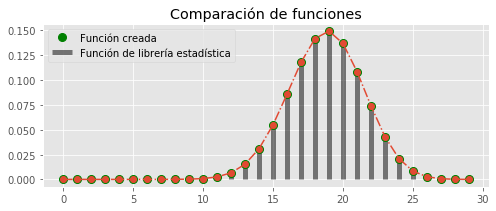

índice: ^DJI


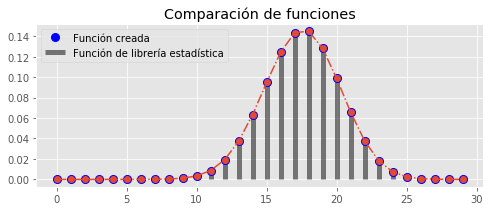

índice: ^IBEX


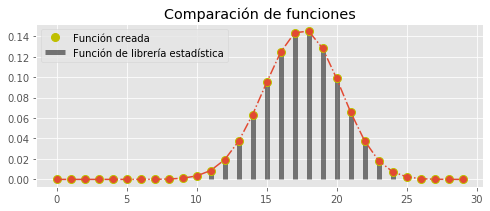

índice: ^FCHI


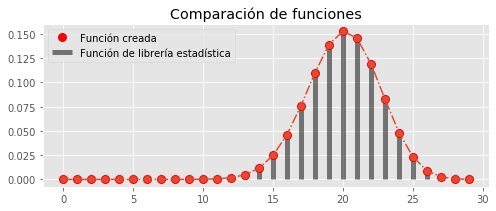

índice: ^KS11


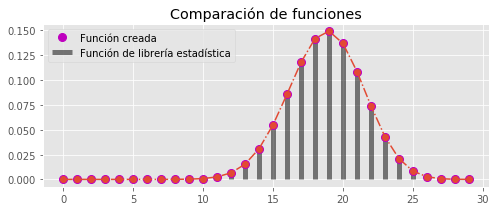

índice: 000001.SS


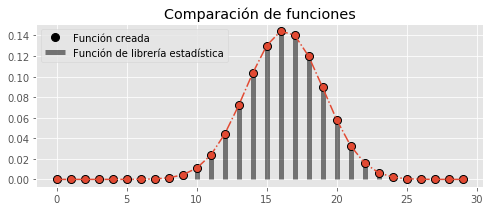

In [74]:
# Distribución binomial creada
long = range(0,len(col_names))
P = list(map(lambda p:comb(n,m)*p_1[p]**m*(1-p_1[p])**(n-m),long))
#[comb(n,m)*p_b1[j]**m*(1-p_b1[j])**(n-m) for j in range(len(p_b1))]

# Distribución binomial del paquete de estadística
P2 = list(map(lambda p : st.binom(n,p_1[p]).pmf(m),long))

# Comparación de función creada con función de python
color = ['go','bo','yo','ro','mo','ko']
for j in long:
    print("índice:",col_names[j])
    plt.figure(figsize=(8,3))
    plt.plot(P[j],color[j], ms=8,label='Función creada')
    plt.plot(P[j],'o-.')
    plt.vlines(m,0,P2[j], lw=5, alpha=0.5,label='Función de librería estadística')
    plt.legend()
    plt.title('Comparación de funciones')
    plt.show()

Máximo p1: 19 prob1: 0.625
Máximo p2: 11 prob2: 0.375


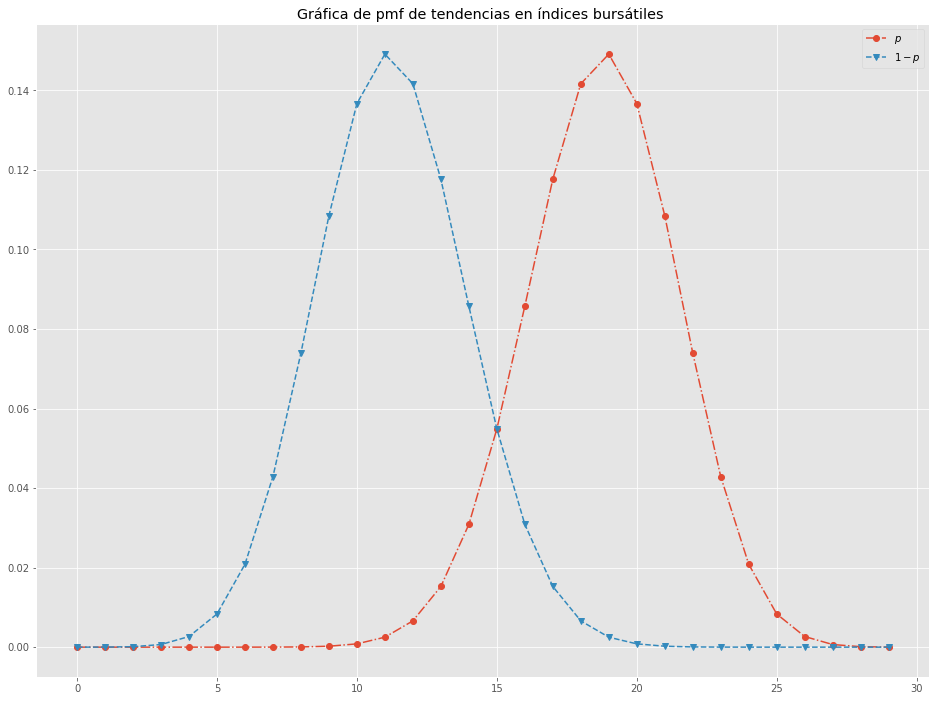

Máximo p1: 18 prob1: 0.583
Máximo p2: 12 prob2: 0.417


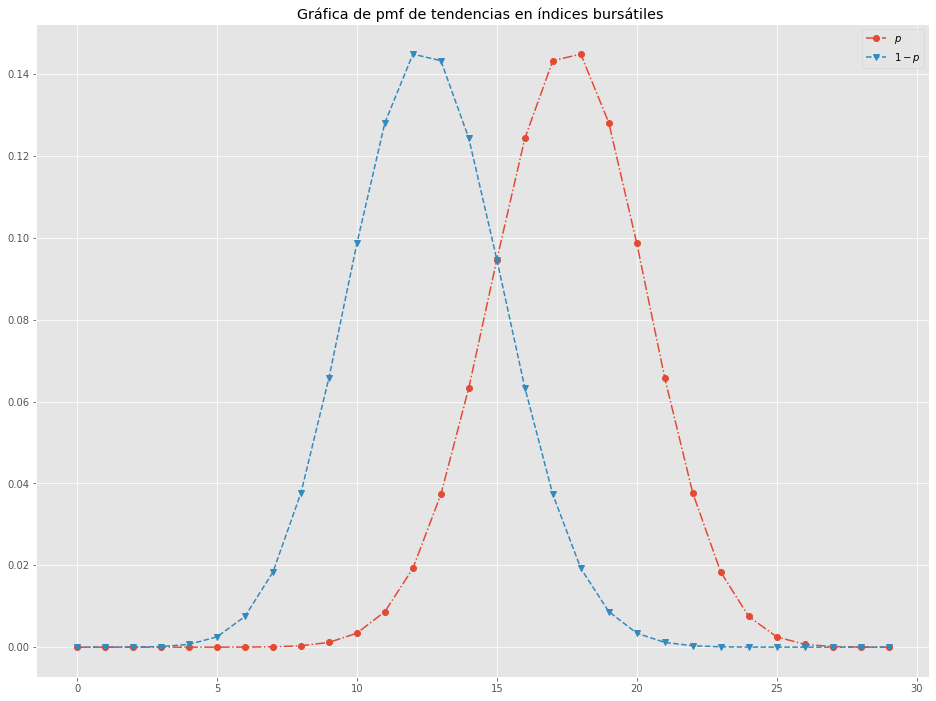

Máximo p1: 18 prob1: 0.583
Máximo p2: 12 prob2: 0.417


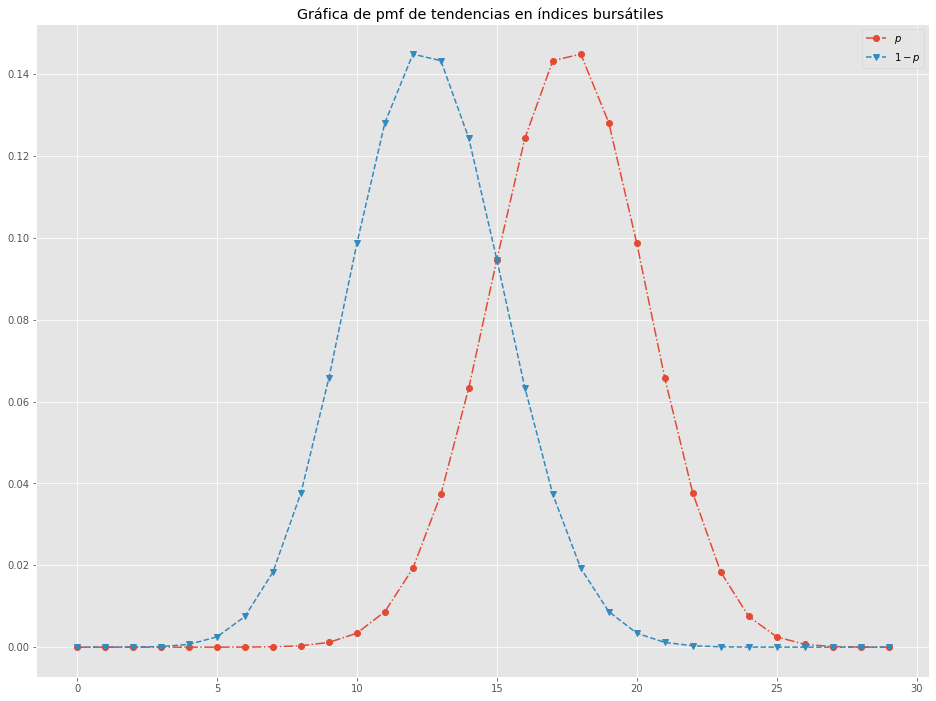

Máximo p1: 20 prob1: 0.667
Máximo p2: 10 prob2: 0.333


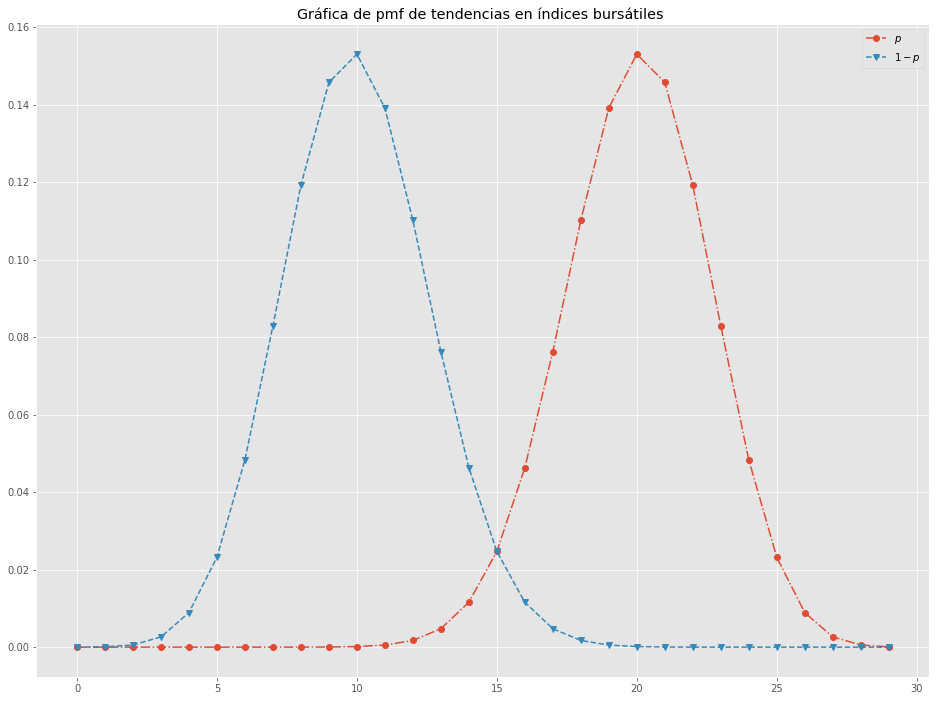

Máximo p1: 19 prob1: 0.625
Máximo p2: 11 prob2: 0.375


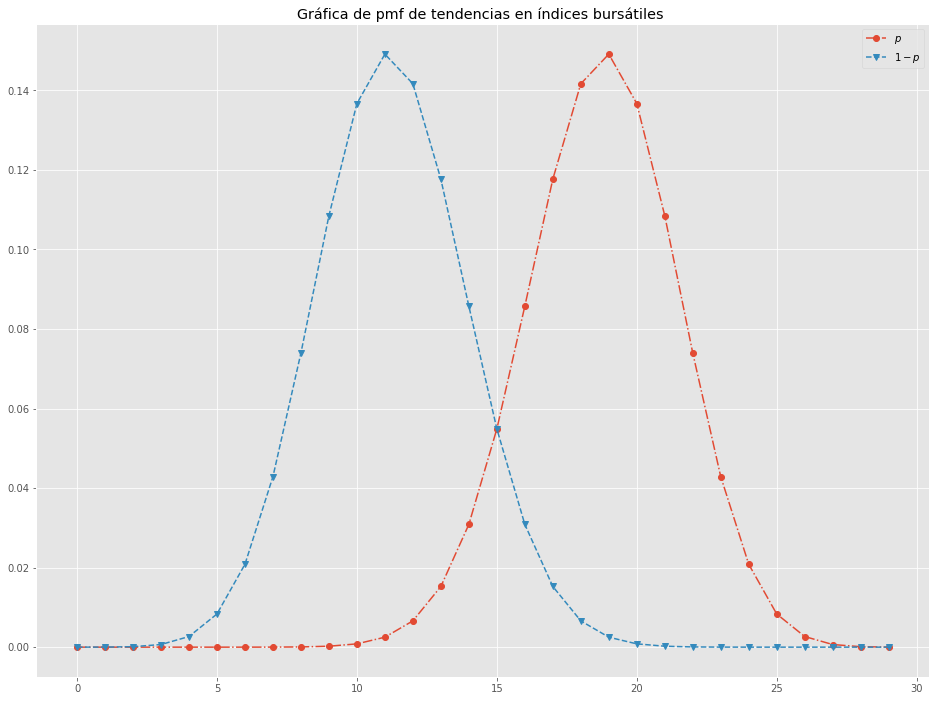

Máximo p1: 16 prob1: 0.542
Máximo p2: 14 prob2: 0.458


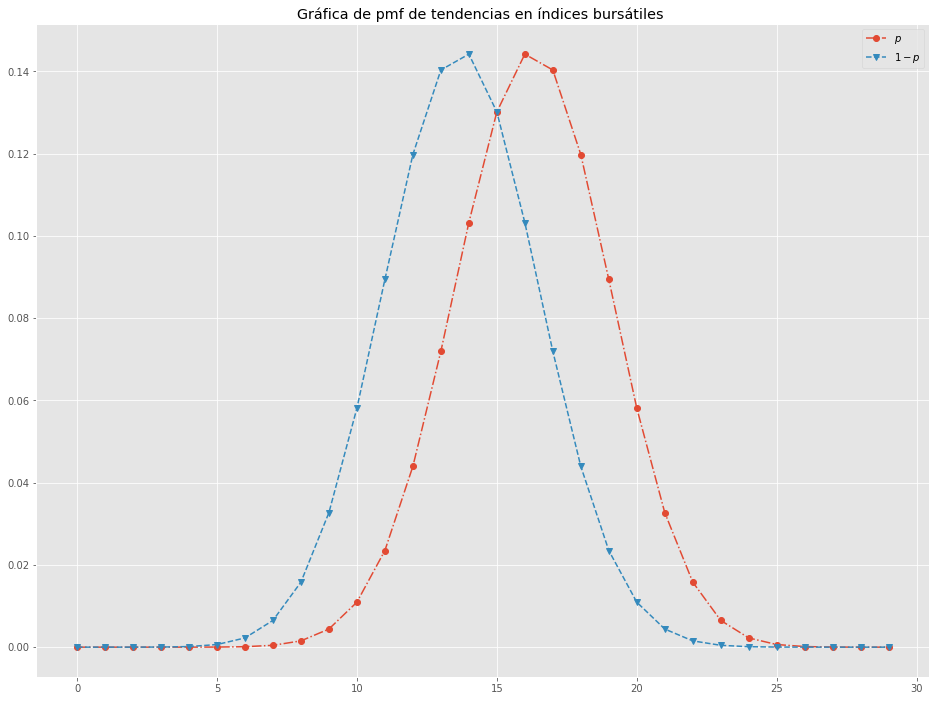

In [75]:
# Grafica de pmf para el problema de costo de activos   
idx_p1 = np.zeros(len(col_names)).astype(int)
idx_p2 = np.zeros(len(col_names)).astype(int)
for t in long:
    p1 = str("{:.3f}".format(p_1[t]))
    p2 = str("{:.3f}".format(p_2[t]))
    print("Máximo p1:",np.argmax(P[t]), "prob1:",p1)
    idx_p1[t] = np.argmax(P[t])
    plt.plot(P[t],'o-.',label='$p$')
    print("Máximo p2:",np.argmax(st.binom(n,p_2[t]).pmf(m)),"prob2:",p2)
    plt.plot(st.binom(n,p_2[t]).pmf(m),'v--',label='$1-p$')
    idx_p2[t] = np.argmax(st.binom(n,p_b2[t]).pmf(m))
    plt.title('Gráfica de pmf de tendencias en índices bursátiles ')
    plt.legend(loc='best')
    plt.show()


In [76]:
max_p1 = list(map(lambda j : P[j].max(),long))
max_p2 = list(map(lambda j : P2[j].max(),long))
max_p1, max_p2

([0.149098752660004,
  0.14486033374551377,
  0.14486033374551377,
  0.15301524319249096,
  0.149098752660004,
  0.14417372082954966],
 [0.14909875266000308,
  0.14486033374551296,
  0.14486033374551296,
  0.15301524319249038,
  0.14909875266000308,
  0.14417372082954816])

In [77]:
#Días con máxima prob de subir y bajar
idx_p1 , idx_p2

(array([19, 18, 18, 20, 19, 16]), array([16, 13, 14, 14, 14, 14]))

In [81]:
unos = np.ones(len(col_names)).astype(int)
ceros = np.zeros(len(col_names)).astype(int)

In [82]:
teo_real = (pd.DataFrame({'idx_p1': idx_p1, 'valor_teop1': unos.astype(int), 'valor_realp1':unos,
              'idx_p':idx_p2,'valor_teop2': ceros.astype(int), 'valor_realp2': real_p2} , index=col_names))
teo_real['resultsp1'] = teo_real['valor_teop1']-teo_real['valor_realp1']
teo_real['resultsp2'] = teo_real['valor_teop2']-teo_real['valor_realp2']
teo_real

,idx_p1,valor_teop1,valor_realp1,idx_p,valor_teop2,valor_realp2,resultsp1,resultsp2
^MXX,19,1,1,16,0,0,0,0
^DJI,18,1,1,13,0,1,0,-1
^IBEX,18,1,1,14,0,0,0,0
^FCHI,20,1,1,14,0,0,0,0
^KS11,19,1,1,14,0,1,0,-1
000001.SS,16,1,1,14,0,1,0,-1
